# Introduction

##### Dans cette partie on propose des techniques d'analyse de données prédictives d'apprentissage automatique supervisé par régression, en utilisant l'algorihtme XGBosting Regressor.

##### C'est un algorithme hybride de l'algorithme Arbres de décision (Decision Tree)
##### Le processus général de Workflow appliqué dans cette partie est donné dans la figure suivante :

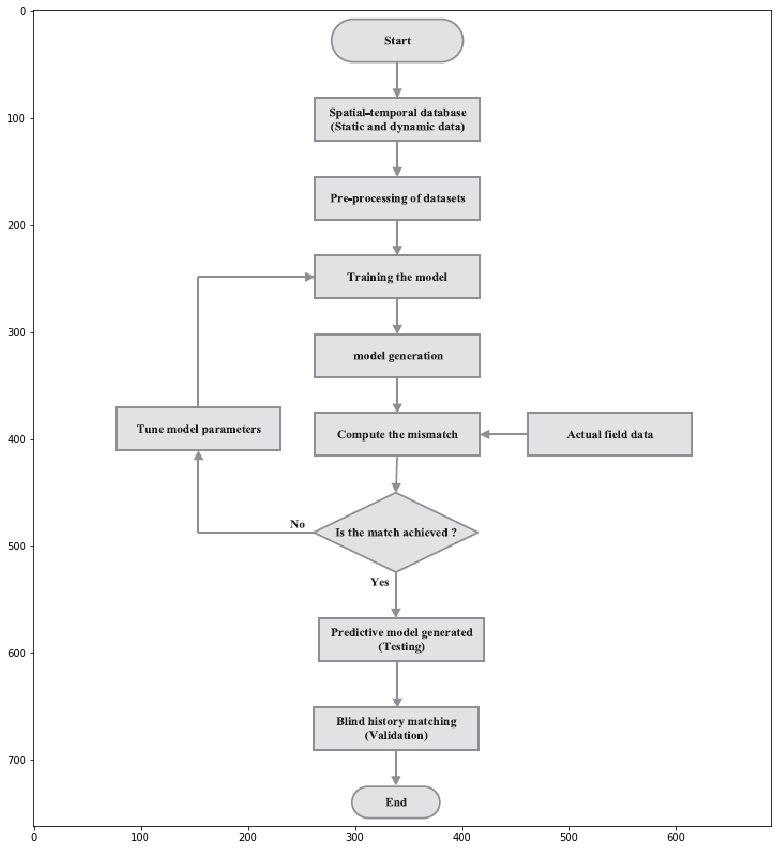

In [470]:
plt.figure(figsize=(30,15))
image = plt.imread('workflow.png')
plt.imshow(image)

# I. Description du Réservoir

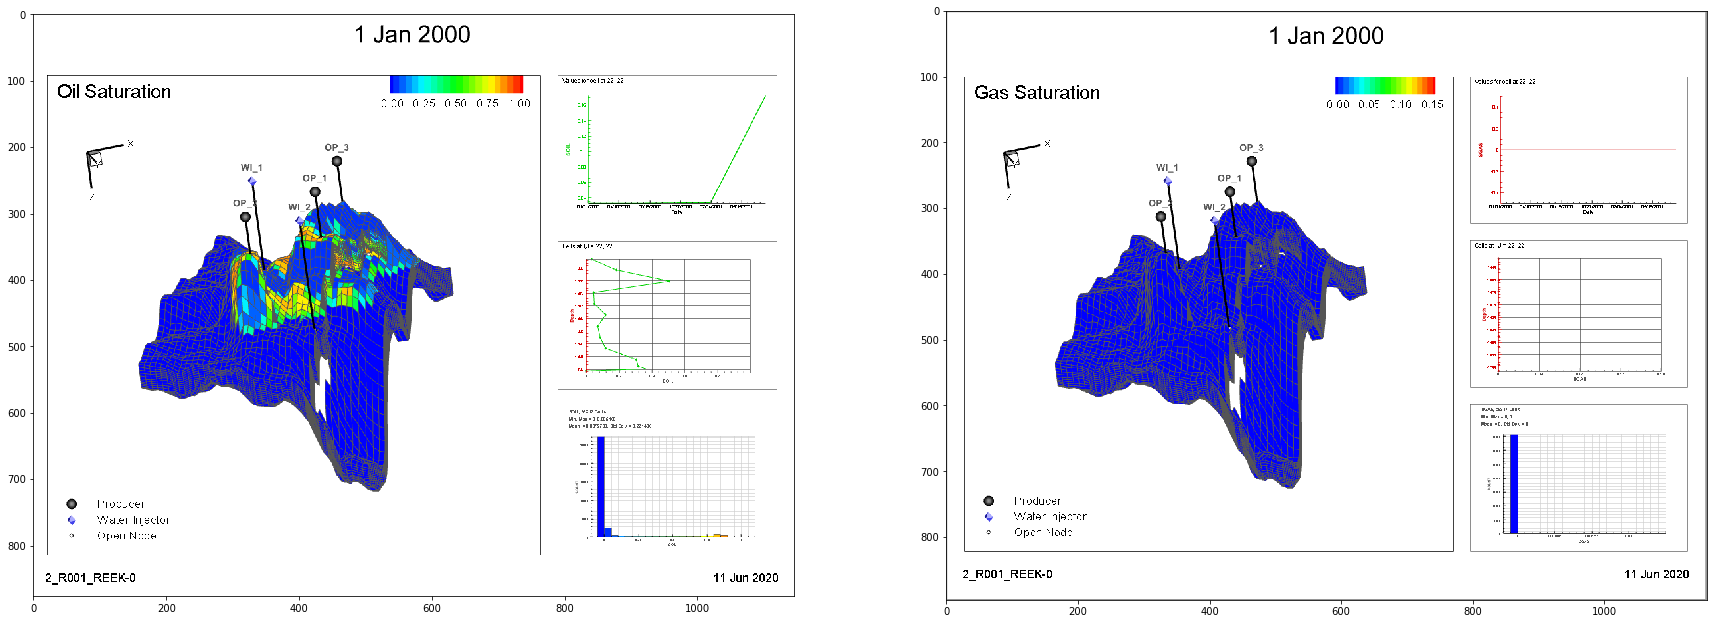

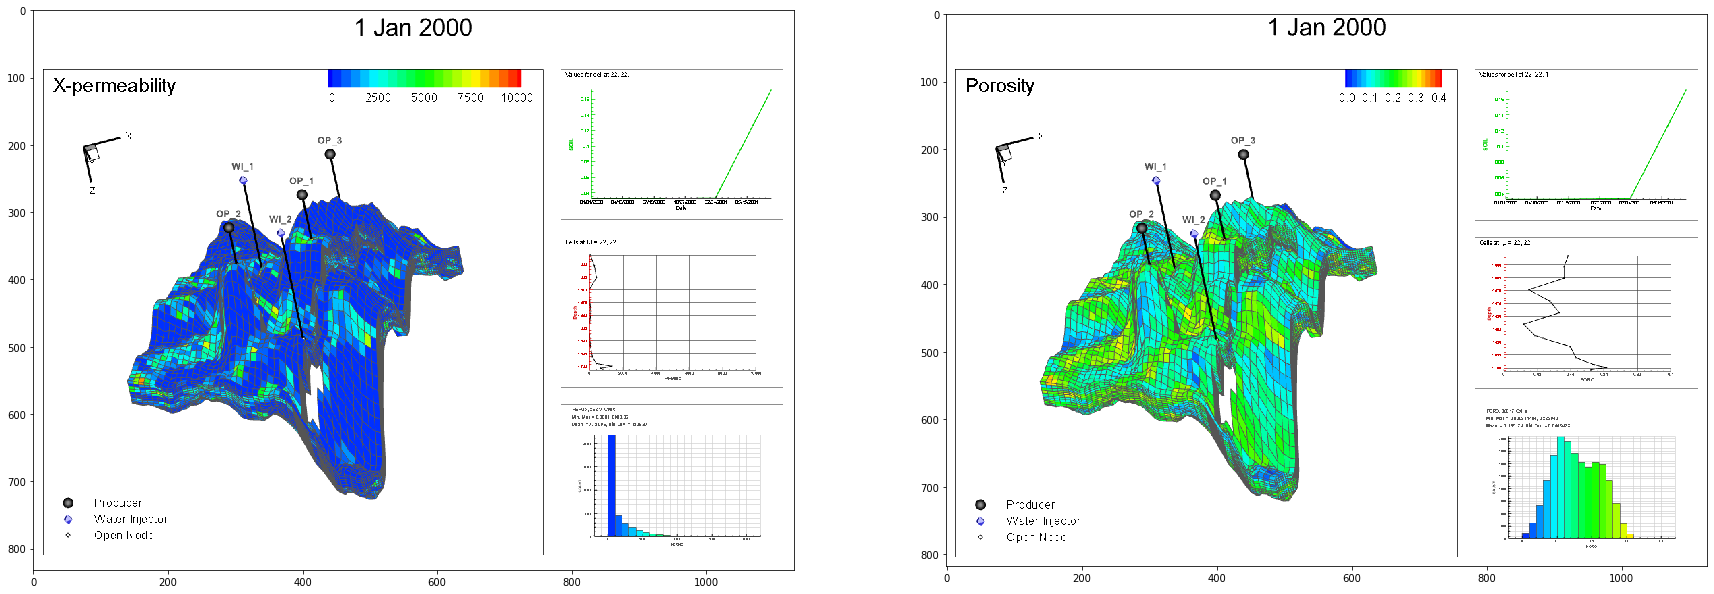

In [466]:
plt.figure(figsize=(30, 20))
plt.subplot(121)
image2 = plt.imread('0.png')
plt.imshow(image2)
plt.subplot(122)
image3 = plt.imread('SGAS.png')
plt.imshow(image3)
plt.figure(figsize=(30, 20))
plt.subplot(121)
image4 = plt.imread('PERMX.png')
plt.imshow(image4)
plt.subplot(122)
image5 = plt.imread('PORO.png')
plt.imshow(image5)

##### Le réservoir ne présente pas des problèmes pétrophysiques avec une variabilité spatiale normale.
##### La zone de production est assez limité et ne contient que de l'huile (Saturation initiale de gaz =0)
##### La durée de production est 2 ans ( c'est assez réduit).

# II. Import Libraries

In [1]:
# import standard libraries
import pandas as pd
import numpy as np


# import plotting libraries
import matplotlib.pyplot as plt


# modeling libraries
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV


# Pre-Processing Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression

# III. Load Field Data

In [2]:
Grid=pd.read_csv("Grid_properties.csv")
Grid.head()

,Well/Cell,I,J,k,FIPGAS,FIPOIL,FIPWAT,PRESSURE,GASOILRATIO,SGAS,...,PC W-O,PERMX,PERMY,PERMZ,PORO,PORV,SWATINI,TRANSX,TRANSY,TRANSZ
0,0,1,1,1,0.0,0.0,27575.4609,341.826416,184,0,...,-1.000000e+20,1098.01074,787.695984,20.995466,0.222677,28403.8340,1.0,78.711472,56.031998,240.512039
1,0,2,1,1,0.0,0.0,39632.2227,341.933960,184,0,...,-1.000000e+20,6481.29199,6481.951170,1028.301150,0.323904,40822.3633,1.0,296.411072,268.641815,229.261398
2,0,3,1,1,0.0,0.0,36735.4883,342.014282,184,0,...,-1.000000e+20,8594.88184,8566.705080,2458.295900,0.319122,37838.3438,1.0,211.665527,194.903976,224.344330
3,0,4,1,1,0.0,0.0,25981.4727,342.144714,184,0,...,-1.000000e+20,4262.83936,4464.564450,1302.271850,0.259077,26761.1465,1.0,92.052566,86.004074,550.894104
4,0,5,1,1,0.0,0.0,22473.0078,342.368042,184,0,...,-1.000000e+20,2365.01172,2243.458250,198.048248,0.256040,23146.9590,1.0,10.552869,53.079861,6777.769040


In [3]:
Grid.shape

(35817, 31)

In [90]:
Grid.describe()

,Well/Cell,I,J,k,FIPGAS,FIPOIL,FIPWAT,PRESSURE,GASOILRATIO,SGAS,...,PC W-O,PERMX,PERMY,PERMZ,PORO,PORV,SWATINI,TRANSX,TRANSY,TRANSZ
count,35817.000000,35817.000000,35817.000000,35817.000000,3.581700e+04,35817.000000,35817.000000,35817.000000,35817.0,35817.0,...,3.581700e+04,35817.000000,35817.000000,35817.000000,35817.000000,35817.000000,35817.000000,35817.000000,35817.000000,3.581700e+04
mean,0.014323,20.508139,32.500712,7.497334,1.456607e+05,791.634392,9588.619902,334.664789,184.0,0.0,...,-7.622079e+19,772.094502,767.435936,149.731505,0.157174,11142.123152,0.915426,12.229514,12.491091,6.139919e+03
std,0.283453,11.540184,18.478675,4.030422,4.475263e+05,2432.207900,5699.103591,16.450204,0.0,0.0,...,4.257371e+19,1209.671833,1205.988592,298.455054,0.066347,6090.855586,0.225158,22.672973,22.851758,2.971448e+04
min,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,1.789483,300.800598,184.0,0.0,...,-1.000000e+20,0.000100,0.000100,0.000030,0.000814,1.843383,0.114836,0.000000,0.000000,0.000000e+00
25%,0.000000,11.000000,16.000000,4.000000,0.000000e+00,0.000000,5174.604000,337.244293,184.0,0.0,...,-1.000000e+20,9.756546,9.737460,1.802282,0.105326,6645.653320,1.000000,0.143824,0.180161,3.793660e+01
50%,0.000000,21.000000,33.000000,7.000000,0.000000e+00,0.000000,8752.500000,340.982941,184.0,0.0,...,-1.000000e+20,190.304276,190.161499,6.459425,0.151625,10321.047900,1.000000,0.739119,0.911794,1.509657e+02
75%,0.000000,31.000000,49.000000,11.000000,0.000000e+00,0.000000,13183.585000,344.162170,184.0,0.0,...,-1.000000e+20,1082.849850,1071.220460,160.667236,0.211047,14913.583000,1.000000,15.364225,15.882032,1.675075e+03
max,8.000000,40.000000,64.000000,14.000000,5.384870e+06,29265.597700,41684.804700,364.839294,184.0,0.0,...,2.262644e+01,9903.649410,9903.649410,2970.470210,0.388942,55204.406300,1.000000,296.411072,268.641815,1.194995e+06


In [92]:
Grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35817 entries, 0 to 35816
Data columns (total 31 columns):
Well/Cell      35817 non-null int64
I              35817 non-null int64
J              35817 non-null int64
k              35817 non-null int64
FIPGAS         35817 non-null float64
FIPOIL         35817 non-null float64
FIPWAT         35817 non-null float64
PRESSURE       35817 non-null float64
GASOILRATIO    35817 non-null int64
SGAS           35817 non-null int64
SOIL           35817 non-null float64
SWAT           35817 non-null float64
KRG            35817 non-null float64
KRO            35817 non-null float64
KRW            35817 non-null float64
MULTPV         35817 non-null int64
MULT-TX        35817 non-null float64
MULT-TY        35817 non-null float64
MULT-TZ        35817 non-null float64
NTG            35817 non-null int64
PC G-O         35817 non-null float64
PC W-O         35817 non-null float64
PERMX          35817 non-null float64
PERMY          35817 non-null flo

In [285]:
Sim_Field = pd.read_csv("Sim_Results_Reek_Field.csv")
Sim_Field.head()

,Date,GOR,GPR,GPT,LPR,OIP,OPR,OPT,PRESSURE,VPR,VPT,WCT,WGR,WIP,WIR,WIT,WPR,WPT
0,36526.000,0.0,0.0,0.0,0.0,28353970,0.0,0.0,306.415558,0.0,0.0,0.0,0.0,343435584,0.0,0.0,0.0,0.0
1,36527.000,0.0,0.0,0.0,0.0,28353970,0.0,0.0,306.415558,0.0,0.0,0.0,0.0,343435584,0.0,0.0,0.0,0.0
2,36530.000,0.0,0.0,0.0,0.0,28353970,0.0,0.0,306.415558,0.0,0.0,0.0,0.0,343435584,0.0,0.0,0.0,0.0
3,36530.500,0.0,0.0,0.0,0.0,28353970,0.0,0.0,306.415558,0.0,0.0,0.0,0.0,343435584,0.0,0.0,0.0,0.0
4,36531.125,0.0,0.0,0.0,0.0,28353970,0.0,0.0,306.415558,0.0,0.0,0.0,0.0,343435584,0.0,0.0,0.0,0.0


In [286]:
History_Prod_Data = pd.read_csv("History_Results_Reek_Field.csv")
History_Prod_Data.head()

,Date,GORH,GPRH,GPTH,LPRH,OPRH,OPT,WCTH,WIRH,WITH,WPRH,WPTH
0,36526.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36527.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36530.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36530.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36531.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# IV. History Matching (Well#01)

## IV.1. Oil Production Rate

In [287]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                  # Well 01 DataSet
#--------------------------------------------------------------------------------------------------------------------------------------------#

Well01_Dataset=pd.read_csv("Well01_Dataset.csv")
Well01_Dataset.head()

,OPR,OPRH,GPR,GPRH,WCT,WCTH,OPT,OPTH,GPT,GPTH,WPT,WPTH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.125,0.0,0.0,0.0,414.9260


### IV.1.1. Data Load

In [9]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                          # Oil Production Rate Well 01 (Simulation & History)
#--------------------------------------------------------------------------------------------------------------------------------------------#

OPR0_Well01 = Well01_Dataset.drop(['GPRH','GPR','WCTH','WCT','OPTH','OPT','GPTH','GPT','WPTH','WPT'],axis=1)
OPR0_Well01.head()

,OPR,OPRH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,0.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,1.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,4.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,4.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,5.125,0.0,0.0,0.0,414.9260


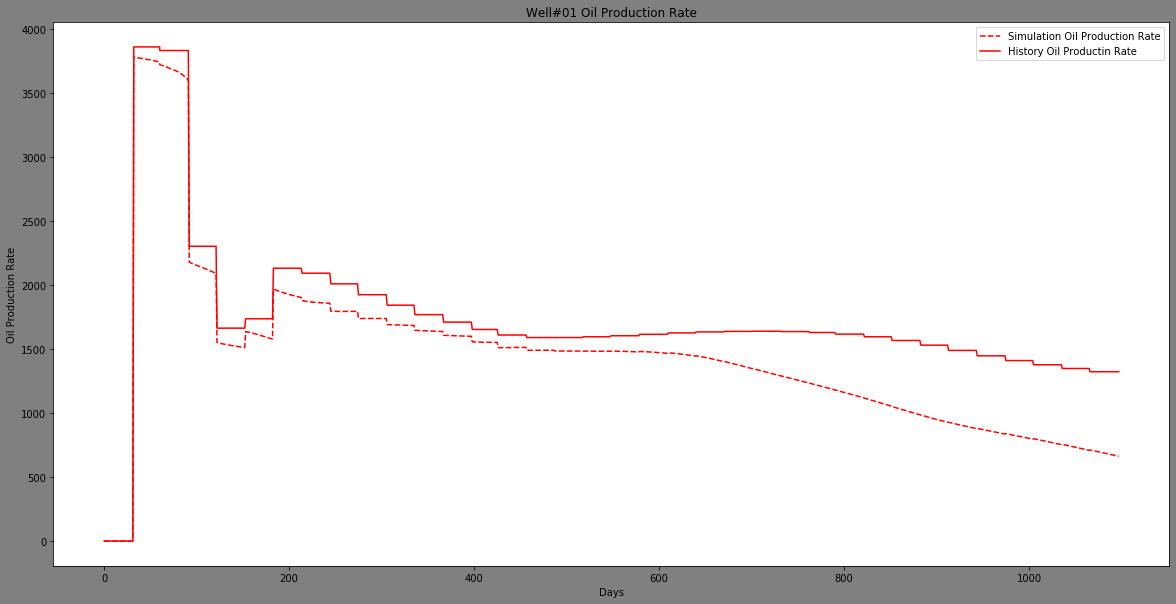

In [10]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#01 Oil Production Rate')
plt.plot(OPR0_Well01.iloc[:,2],OPR0_Well01.iloc[:,0], 'r--',OPR0_Well01.iloc[:,2],OPR0_Well01.iloc[:,1], 'r' )
plt.legend(['Simulation Oil Production Rate','History Oil Productin Rate'],loc='upper right')

In [11]:
OPR1_Well01 = OPR0_Well01.drop(['OPR'],axis=1)
OPR1_Well01.head()

,OPRH,Date,BHP,GOR,PI,Temperature
0,0.0,0.000,0.0,0.0,0.0,415.0000
1,0.0,1.000,0.0,0.0,0.0,414.9815
2,0.0,4.000,0.0,0.0,0.0,414.9630
3,0.0,4.500,0.0,0.0,0.0,414.9445
4,0.0,5.125,0.0,0.0,0.0,414.9260


#####  Target y = OPRH  
##### Features X = Date, BHP, GOR, PI, Temperature

In [12]:
Y1_Well01 = OPR1_Well01.iloc[:,0].values
X1_Well01 = OPR1_Well01.iloc[:,1:].values

Y1_Well01 = Y1_Well01.reshape(378,1)


In [13]:
Time_Well01 = OPR1_Well01.iloc[:,1].values
Time_Well01 = Time_Well01.reshape(378,1)

### IV.1.2. Pre-Processing

#### IV.1.2.1. Input feature Selection

In [17]:
selector = SelectKBest(f_regression, k=5)
selector.fit(X1_Well01, Y1_Well01)
selector.scores_

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([  75.92737131,  180.18323884,  117.48550498, 1737.47189649,
         69.7983255 ])

In [18]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X1_Well01, Y1_Well01)
selector.scores_
selector.get_support()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False,  True,  True,  True, False])

##### Final DataSet

In [19]:
OPR_Well01 = OPR1_Well01.drop(['Date','Temperature'],axis=1)
OPR_Well01.head()

,OPRH,BHP,GOR,PI
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [21]:
YOPR_Well01 = OPR_Well01.iloc[:,0].values
XOPR_Well01 = OPR_Well01.iloc[:,1:].values
YOPR_Well01 = YOPR_Well01.reshape(378,1)

#### IV.1.2.2. Test_Train_Split 


###### train set : Dont les données sont utilisées pour entraîner le modèle 
###### test set : reservé uniquement à l'évaluation du modèle


In [22]:
XOPR_Well01_train, XOPR_Well01_test, YOPR_Well01_train, YOPR_Well01_test = train_test_split(XOPR_Well01, YOPR_Well01, random_state=0, test_size = 0.2)
Time_Well01_train, Time_Well01_test =train_test_split(Time_Well01, random_state=0, test_size = 0.2)

In [23]:
YOPR_Well01_train = YOPR_Well01_train.reshape(302,1)
YOPR_Well01_test = YOPR_Well01_test.reshape(76,1)

#### IV.1.2.3. Normalization

### * MinMaxScaler

In [24]:
Scaler = MinMaxScaler ()
XOPR_Well01_train_MinMax =Scaler.fit_transform (XOPR_Well01_train)
XOPR_Well01_test_MinMax =Scaler.fit_transform (XOPR_Well01_test)

Time_Well01_test_MinMax =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_MinMax =Scaler.fit_transform (Time_Well01_train)

YOPR_Well01_train_MinMax =Scaler.fit_transform (YOPR_Well01_train)
YOPR_Well01_test_MinMax =Scaler.fit_transform (YOPR_Well01_test)



### * StandardScaler

In [25]:
Scaler = StandardScaler()
XOPR_Well01_train_Std =Scaler.fit_transform (XOPR_Well01_train)
XOPR_Well01_test_Std =Scaler.fit_transform (XOPR_Well01_test)

Time_Well01_test_Std =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_Std =Scaler.fit_transform (Time_Well01_train)

YOPR_Well01_train_Std =Scaler.fit_transform (YOPR_Well01_train)
YOPR_Well01_test_Std =Scaler.fit_transform (YOPR_Well01_test)

### * RobustScaler

In [26]:
Scaler = RobustScaler()
XOPR_Well01_train_Robust =Scaler.fit_transform (XOPR_Well01_train)
XOPR_Well01_test_Robust =Scaler.fit_transform (XOPR_Well01_test)

Time_Well01_test_Robust =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_Robust =Scaler.fit_transform (Time_Well01_train)

YOPR_Well01_train_Robust =Scaler.fit_transform (YOPR_Well01_train)
YOPR_Well01_test_Robust=Scaler.fit_transform (YOPR_Well01_test)


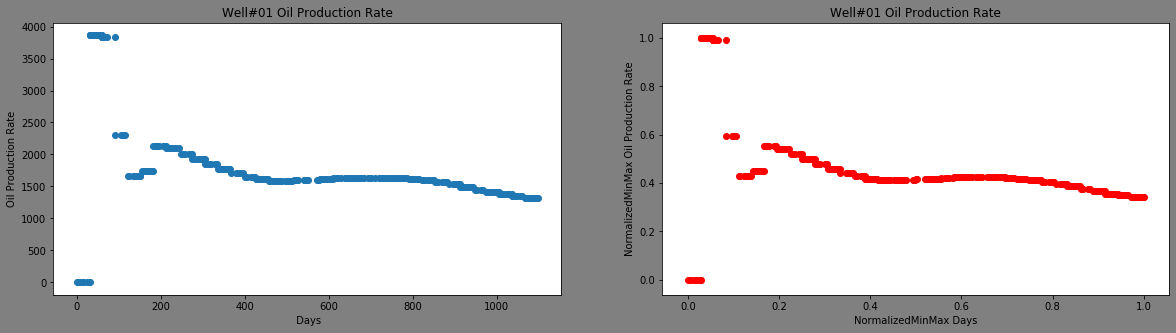

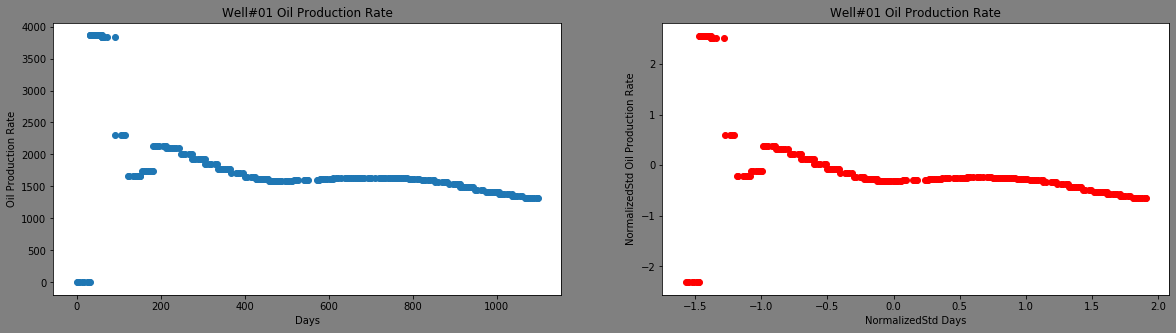

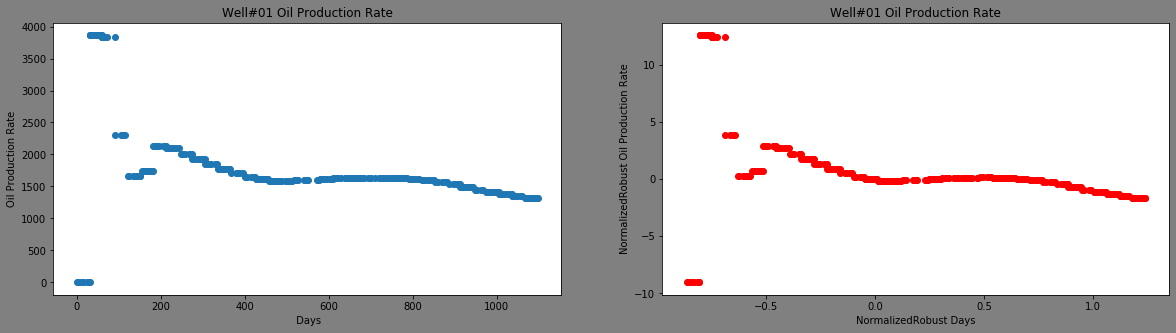

In [291]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel(' Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#01 Oil Production Rate')
plt.scatter(Time_Well01_train, YOPR_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedMinMax Days'), plt.ylabel('NormalizedMinMax Oil Production Rate'), plt.title('Well#01 Oil Production Rate')
plt.scatter(Time_Well01_train_MinMax, YOPR_Well01_train_MinMax,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#01 Oil Production Rate')
plt.scatter(Time_Well01_train[:,0], YOPR_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedStd Days'), plt.ylabel('NormalizedStd Oil Production Rate'), plt.title('Well#01 Oil Production Rate')
plt.scatter(Time_Well01_train_Std[:,0], YOPR_Well01_train_Std,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel(' Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#01 Oil Production Rate')
plt.scatter(Time_Well01_train[:,0], YOPR_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedRobust Days'), plt.ylabel('NormalizedRobust Oil Production Rate'), plt.title('Well#01 Oil Production Rate')
plt.scatter(Time_Well01_train_Robust[:,0], YOPR_Well01_train_Robust,c = 'r')

{'whiskers': [<matplotlib.lines.Line2D at 0x251c5264fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x251c5269ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c5264748>],
 'medians': [<matplotlib.lines.Line2D at 0x251c526efc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c56828c8>],
 'means': []}

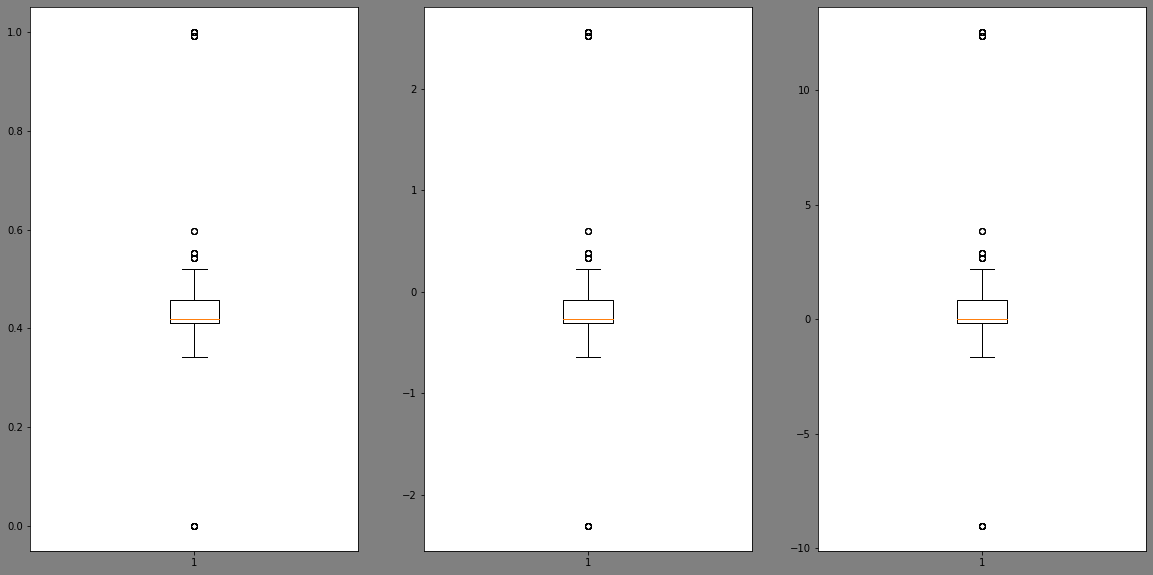

In [292]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.subplot(131)
plt.boxplot(YOPR_Well01_train_MinMax)
plt.subplot(132)
plt.boxplot(YOPR_Well01_train_Std)
plt.subplot(133)
plt.boxplot(YOPR_Well01_train_Robust)

### --> On choisit la normalisation Robust car la boite à moustache est plus centré 

### IV.1.3. Entraînement du modèle 

In [1]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =5, learning_rate=0.1))

model.fit(XOPR_Well01_train, YOPR_Well01_train)

NameError: name 'make_pipeline' is not defined

In [30]:
print('R² = ' ,model.score(XOPR_Well01_test,  YOPR_Well01_test)* 100, "%")

R² =  89.79884253023587 %


In [31]:
y_predict_1 = model.predict(XOPR_Well01_train)
y_predict_2 = model.predict(XOPR_Well01_test)

print('error = ', mean_absolute_error(YOPR_Well01_test, y_predict_2))

error =  231.58750143104442


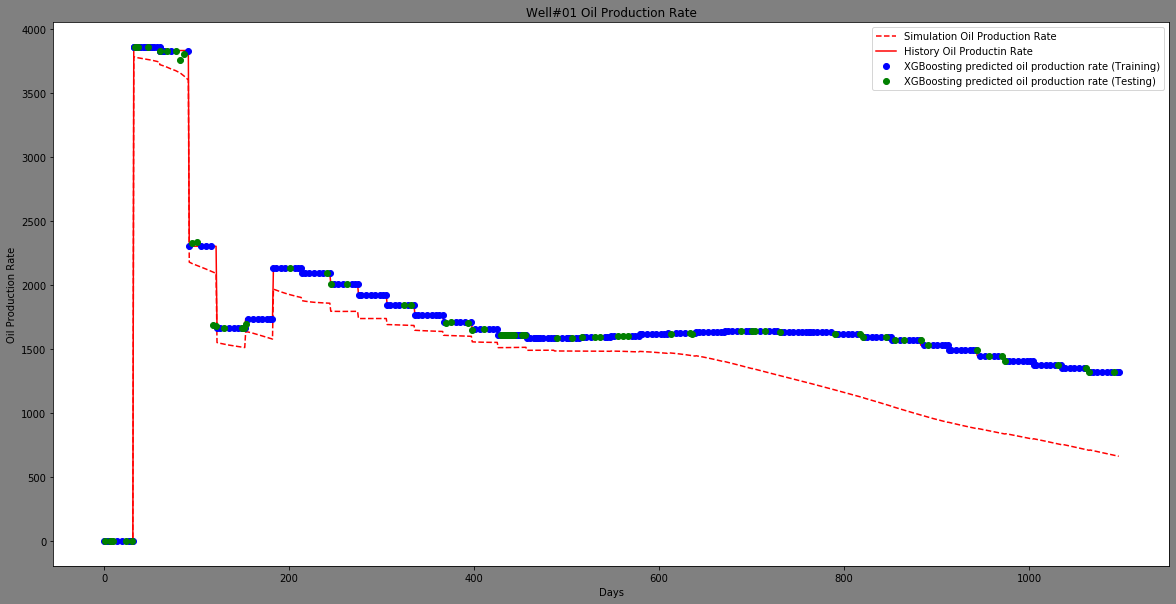

In [294]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#01 Oil Production Rate')

plt.plot(Time_Well01,OPR0_Well01.iloc[:,0], 'r--')
plt.plot(Time_Well01, OPR0_Well01.iloc[:,1],'r')
plt.plot(Time_Well01_train,y_predict_1,'bo')
plt.plot(Time_Well01_test,y_predict_2,'go')
plt.legend(['Simulation Oil Production Rate','History Oil Productin Rate',
            'XGBoosting predicted oil production rate (Training)',
            'XGBoosting predicted oil production rate (Testing)'],loc='upper right')

### IV.1.4. Validation du modèle

In [34]:
model = XGBRegressor()
cross_val_score(XGBRegressor(n_estimators = 100), XOPR_Well01_train, YOPR_Well01_train, cv=5).mean()

0.9871889471710535

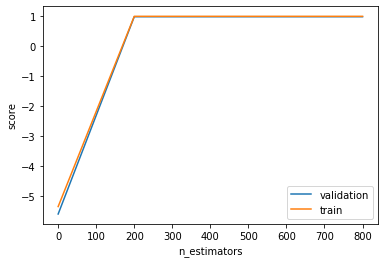

In [35]:
model = XGBRegressor()
k = np.arange(0, 1000, 200)

train_score, val_score = validation_curve(model, XOPR_Well01_train, YOPR_Well01_train,
                                          'n_estimators', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

### --> n_estimators = 200 !!

### IV.1.5. Amélioration du modèle

In [37]:
param_grid = {'n_estimators': np.arange(0, 1000,100),
              'learning_rate' : np.arange(0,1,0.1), 
              'num_parallel_tree': np.arange(1,10,1),
              'random_state' :np.arange(0,100, 10)
             }
grid = GridSearchCV(XGBRegressor(),param_grid,cv=5)
grid.fit(XOPR_Well01_train, YOPR_Well01_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': 

In [38]:
print("Best R²= %f using %s" % (grid.best_score_, grid.best_params_))

Best R²= 0.987329 using {'learning_rate': 0.1, 'n_estimators': 400, 'num_parallel_tree': 6, 'random_state': 0}


#### --> C'est fini ! Le modèle de machine learning est prêt à être utilisé 

### IV.1.6. Visualation des résultats

R² =  98.62543121084158 %
error =  21.904419469343893


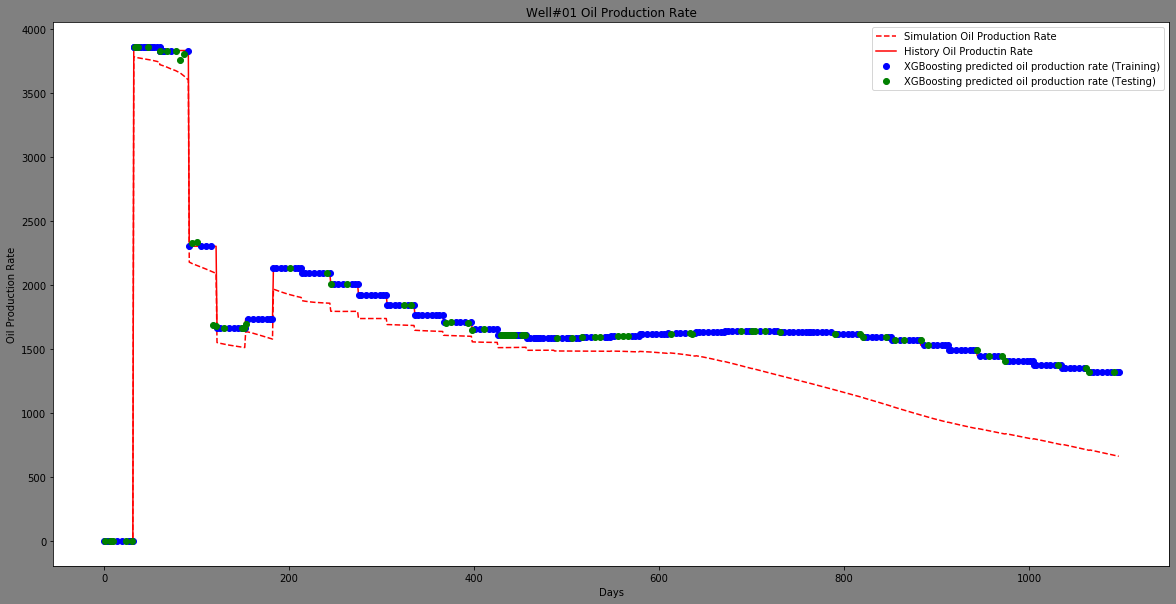

In [293]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =400, learning_rate=0.1, num_parallel_tree= 6 ))

model.fit(XOPR_Well01_train, YOPR_Well01_train)
print('R² = ' ,model.score(XOPR_Well01_test,  YOPR_Well01_test)* 100, "%")
y_predict_1 = model.predict(XOPR_Well01_train)
y_predict_2 = model.predict(XOPR_Well01_test)

print('error = ', mean_absolute_error(YOPR_Well01_test, y_predict_2))


#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#01 Oil Production Rate')

plt.plot(Time_Well01,OPR0_Well01.iloc[:,0], 'r--')
plt.plot(Time_Well01, OPR0_Well01.iloc[:,1],'r')
plt.plot(Time_Well01_train,y_predict_1,'bo')
plt.plot(Time_Well01_test,y_predict_2,'go')
plt.legend(['Simulation Oil Production Rate','History Oil Productin Rate',
            'XGBoosting predicted oil production rate (Training)',
            'XGBoosting predicted oil production rate (Testing)'],loc='upper right')


## IV.2. GAS PRODUCTION RATE

### IV.2.1. Data Load

In [40]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                          # Gas Production Rate Well 01 (Simulation & History)
#--------------------------------------------------------------------------------------------------------------------------------------------#

GPR0_Well01 = Well01_Dataset.drop(['OPRH','OPR','WCTH','WCT','OPTH','OPT','GPTH','GPT','WPTH','WPT'],axis=1)
GPR0_Well01.head()

,GPR,GPRH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,0.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,1.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,4.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,4.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,5.125,0.0,0.0,0.0,414.9260


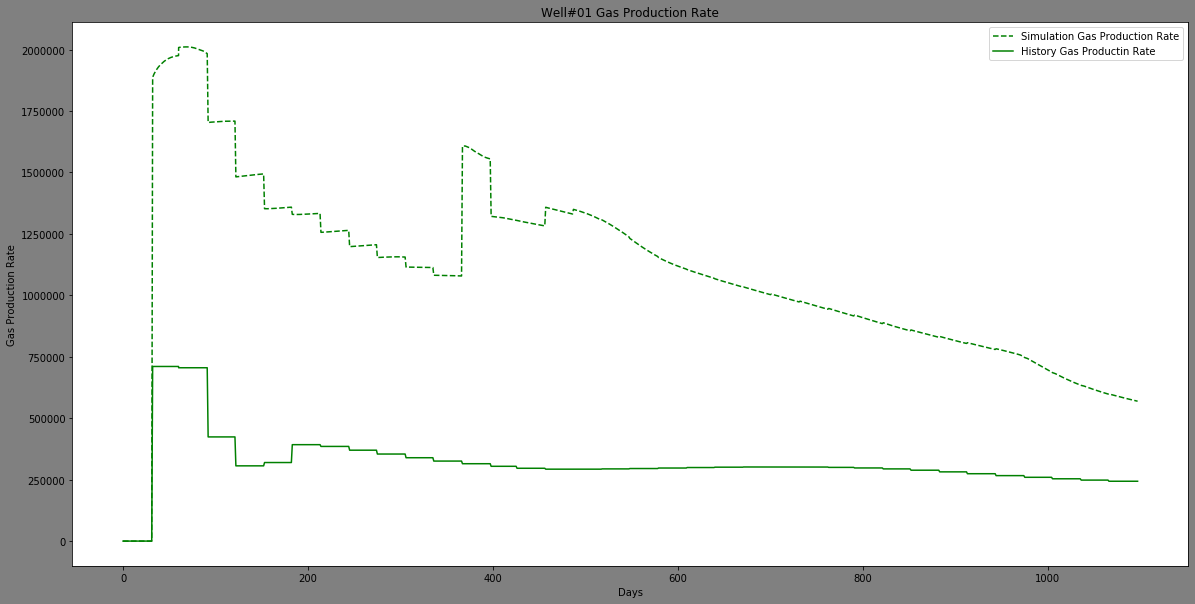

In [41]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#01 Gas Production Rate')
plt.plot(GPR0_Well01.iloc[:,2],GPR0_Well01.iloc[:,0], 'g--',GPR0_Well01.iloc[:,2],GPR0_Well01.iloc[:,1], 'g' )
plt.legend(['Simulation Gas Production Rate','History Gas Productin Rate'],loc='upper right')

In [42]:
GPR1_Well01 = GPR0_Well01.drop(['GPR'],axis=1)
GPR1_Well01.head()

,GPRH,Date,BHP,GOR,PI,Temperature
0,0.0,0.000,0.0,0.0,0.0,415.0000
1,0.0,1.000,0.0,0.0,0.0,414.9815
2,0.0,4.000,0.0,0.0,0.0,414.9630
3,0.0,4.500,0.0,0.0,0.0,414.9445
4,0.0,5.125,0.0,0.0,0.0,414.9260


#####  Target y = GPRH  
##### Features X = Date, BHP, GOR, PI, Temperature

In [43]:
Y1_Well01 = GPR1_Well01.iloc[:,0].values
X1_Well01 = GPR1_Well01.iloc[:,1:].values

Y1_Well01 = Y1_Well01.reshape(378,1)


In [44]:
Time_Well01 = GPR1_Well01.iloc[:,1].values
Time_Well01 = Time_Well01.reshape(378,1)

### IV.2.2. Pre-Processing

#### IV.2.2.1. Input feature Selection

In [45]:
selector = SelectKBest(f_regression, k=5)
selector.fit(X1_Well01, Y1_Well01)
selector.scores_

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([  75.92735804,  180.18323805,  117.48550983, 1737.47140409,
         69.79830997])

In [46]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X1_Well01, Y1_Well01)
selector.scores_
selector.get_support()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False,  True,  True,  True, False])

##### Final DataSet

In [47]:
GPR_Well01 = GPR1_Well01.drop(['Date','Temperature'],axis=1)
GPR_Well01.head()

,GPRH,BHP,GOR,PI
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [48]:
YGPR_Well01 = GPR_Well01.iloc[:,0].values
XGPR_Well01 = GPR_Well01.iloc[:,1:].values
YGPR_Well01 = YGPR_Well01.reshape(378,1)

#### IV.2.2.2. Test_Train_Split 


###### train set : Dont les données sont utilisées pour entraîner le modèle 
###### test set : reservé uniquement à l'évaluation du modèle


In [49]:
XGPR_Well01_train, XGPR_Well01_test, YGPR_Well01_train, YGPR_Well01_test = train_test_split(XGPR_Well01, YGPR_Well01, random_state=0, test_size = 0.2)
Time_Well01_train, Time_Well01_test =train_test_split(Time_Well01, random_state=0, test_size = 0.2)

In [50]:
YGPR_Well01_train = YGPR_Well01_train.reshape(302,1)
YGPR_Well01_test = YGPR_Well01_test.reshape(76,1)

#### IV.2.2.3. Normalization

### * MinMaxScaler

In [51]:
Scaler = MinMaxScaler ()
XGPR_Well01_train_MinMax =Scaler.fit_transform (XGPR_Well01_train)
XGPR_Well01_test_MinMax =Scaler.fit_transform (XGPR_Well01_test)

Time_Well01_test_MinMax =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_MinMax =Scaler.fit_transform (Time_Well01_train)

YGPR_Well01_train_MinMax =Scaler.fit_transform (YGPR_Well01_train)
YGPR_Well01_test_MinMax =Scaler.fit_transform (YGPR_Well01_test)



### * StandardScaler

In [52]:
Scaler = StandardScaler()
XGPR_Well01_train_Std =Scaler.fit_transform (XGPR_Well01_train)
XGPR_Well01_test_Std =Scaler.fit_transform (XGPR_Well01_test)

Time_Well01_test_Std =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_Std =Scaler.fit_transform (Time_Well01_train)

YGPR_Well01_train_Std =Scaler.fit_transform (YGPR_Well01_train)
YGPR_Well01_test_Std =Scaler.fit_transform (YGPR_Well01_test)

### * RobustScaler

In [53]:
Scaler = RobustScaler()
XGPR_Well01_train_Robust =Scaler.fit_transform (XGPR_Well01_train)
XGPR_Well01_test_Robust =Scaler.fit_transform (XGPR_Well01_test)

Time_Well01_test_Robust =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_Robust =Scaler.fit_transform (Time_Well01_train)

YGPR_Well01_train_Robust =Scaler.fit_transform (YGPR_Well01_train)
YGPR_Well01_test_Robust=Scaler.fit_transform (YGPR_Well01_test)


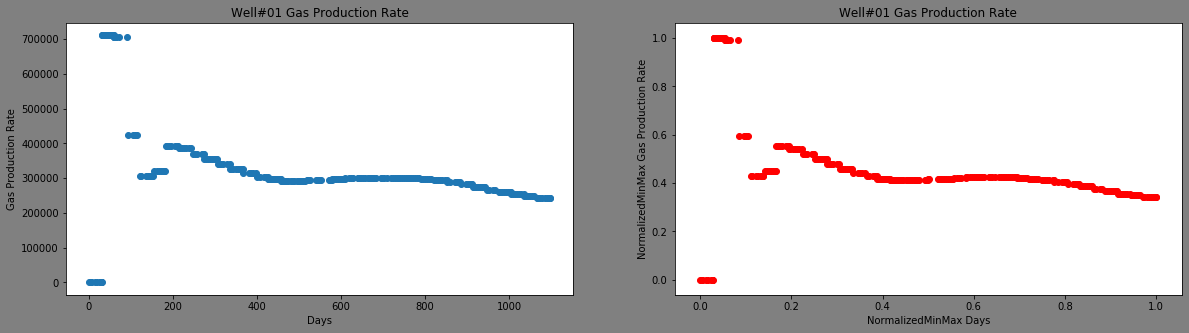

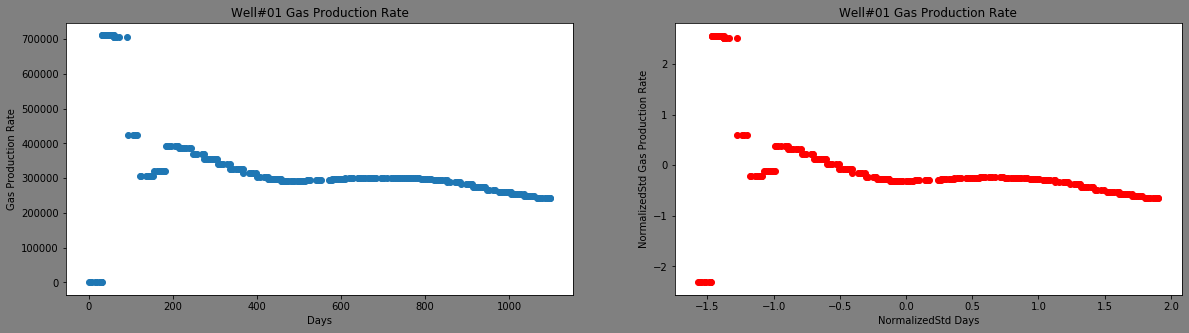

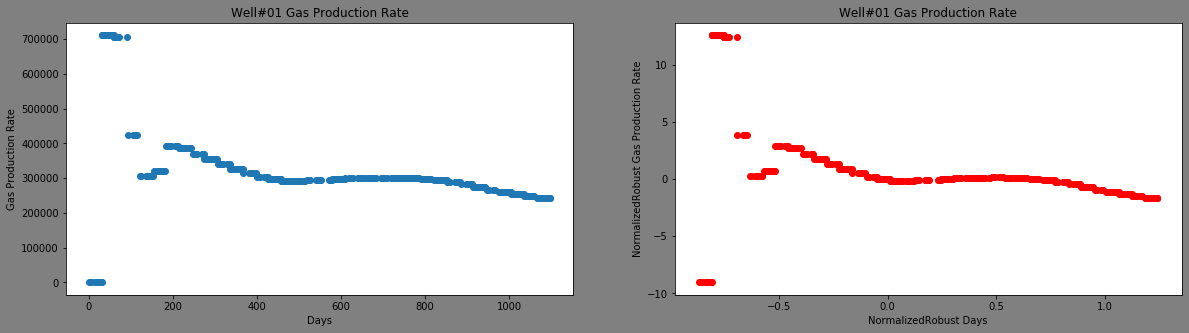

In [54]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#01 Gas Production Rate')
plt.scatter(Time_Well01_train, YGPR_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedMinMax Days'), plt.ylabel('NormalizedMinMax Gas Production Rate'), plt.title('Well#01 Gas Production Rate')
plt.scatter(Time_Well01_train_MinMax, YGPR_Well01_train_MinMax,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#01 Gas Production Rate')
plt.scatter(Time_Well01_train[:,0], YGPR_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedStd Days'), plt.ylabel('NormalizedStd Gas Production Rate'), plt.title('Well#01 Gas Production Rate')
plt.scatter(Time_Well01_train_Std[:,0], YGPR_Well01_train_Std,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#01 Gas Production Rate')
plt.scatter(Time_Well01_train[:,0], YGPR_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedRobust Days'), plt.ylabel('NormalizedRobust Gas Production Rate'), plt.title('Well#01 Gas Production Rate')
plt.scatter(Time_Well01_train_Robust[:,0], YGPR_Well01_train_Robust,c = 'r')

{'whiskers': [<matplotlib.lines.Line2D at 0x251b3d74d48>,
 'caps': [<matplotlib.lines.Line2D at 0x251b3d9ab08>,
 'boxes': [<matplotlib.lines.Line2D at 0x251b3d90fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x251b3d9da88>],
 'fliers': [<matplotlib.lines.Line2D at 0x251b3d9db88>],
 'means': []}

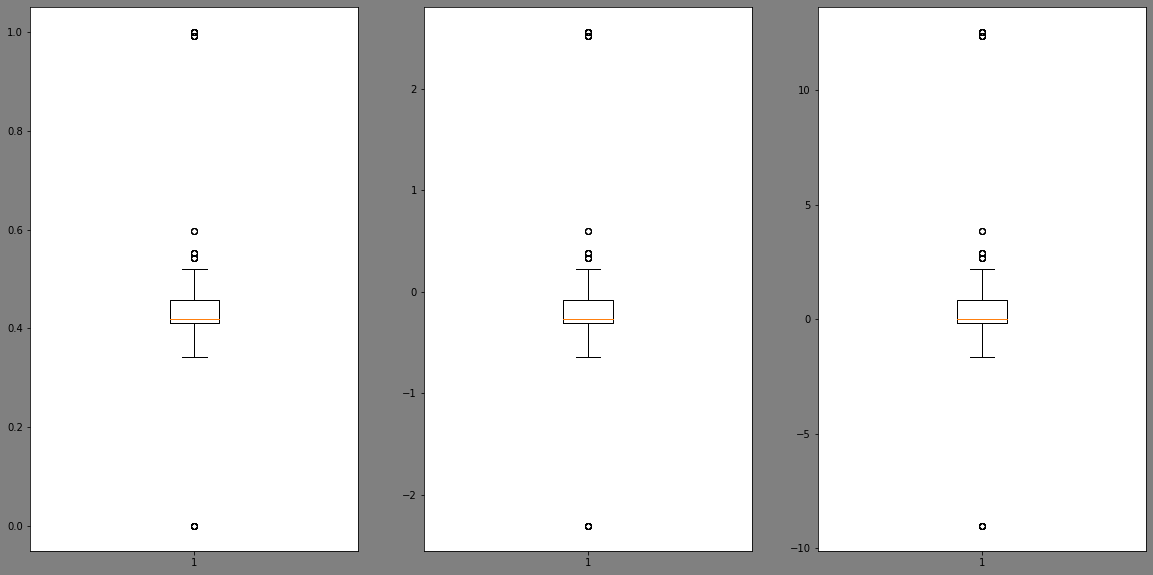

In [55]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.subplot(131)
plt.boxplot(YGPR_Well01_train_MinMax)
plt.subplot(132)
plt.boxplot(YGPR_Well01_train_Std)
plt.subplot(133)
plt.boxplot(YGPR_Well01_train_Robust)

### --> On choisit Robust car boite à moustache est plus centré 

### IV.2.3. Entraînement du modèle 

In [297]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =20, learning_rate=0.1))

model.fit(XGPR_Well01_train, YGPR_Well01_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=20, n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_meth

In [298]:
print('R² = ' ,model.score(XGPR_Well01_test,  YGPR_Well01_test)* 100, "%")

R² =  89.7948898385261 %


In [299]:
y_predict_1 = model.predict(XGPR_Well01_train)
y_predict_2 = model.predict(XGPR_Well01_test)

print('error = ', mean_absolute_error(YGPR_Well01_test, y_predict_2))

error =  42621.943707003506


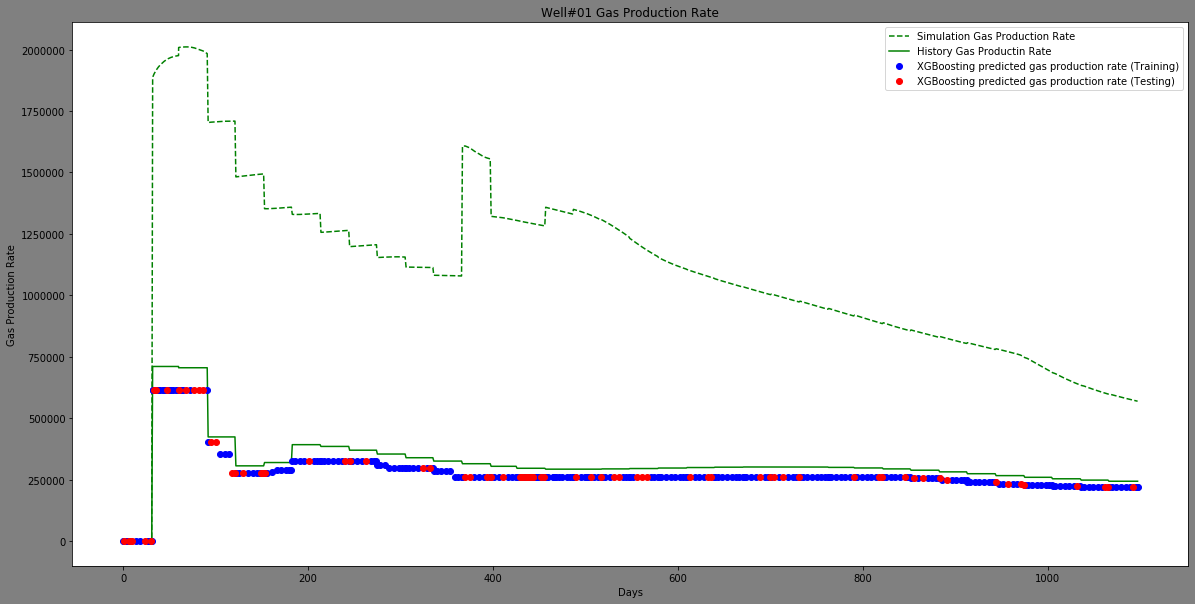

In [300]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#01 Gas Production Rate')

plt.plot(Time_Well01,GPR0_Well01.iloc[:,0], 'g--')
plt.plot(Time_Well01, GPR0_Well01.iloc[:,1],'g')
plt.plot(Time_Well01_train,y_predict_1,'bo')
plt.plot(Time_Well01_test,y_predict_2,'ro')
plt.legend(['Simulation Gas Production Rate','History Gas Productin Rate',
            'XGBoosting predicted gas production rate (Training)',
            'XGBoosting predicted gas production rate (Testing)'],loc='upper right')

### IV.2.4. Validation du modèle

In [301]:
model = XGBRegressor()
cross_val_score(XGBRegressor(n_estimators = 20), XGPR_Well01_train, YGPR_Well01_train, cv=5).mean()

0.9869625648549635

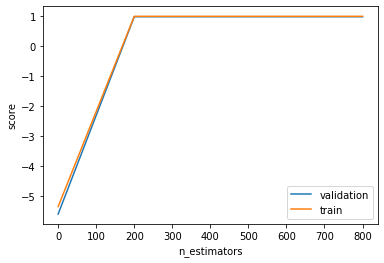

In [302]:
model = XGBRegressor()
k = np.arange(0, 1000, 200)

train_score, val_score = validation_curve(model, XGPR_Well01_train, YGPR_Well01_train,
                                          'n_estimators', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

### --> n_estimators = 300 !!

### IV.2.5. Amélioration du modèle

In [43]:
param_grid = {'n_estimators': np.arange(0, 1000,100),
              'learning_rate' : np.arange(0,1,0.1), 
              'num_parallel_tree': np.arange(1,10,1),
              'random_state' :np.arange(0,100, 10)
             }
grid = GridSearchCV(XGBRegressor(),param_grid,cv=5)
grid.fit(XGPR_Well01_train, YGPR_Well01_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': 

In [339]:
print("Best R²= %f using %s" % (grid.best_score_, grid.best_params_))

Best R²= 0.877663 using {'learning_rate': 0.30000000000000004, 'n_estimators': 50, 'num_parallel_tree': 6, 'random_state': 0}


#### --> C'est fini ! Le modèle de machine learning est prêt à être utilisé 

### IV.2.6. Visualation des résultats

R² =  98.8298634700163 %
error =  4086.8234352767913


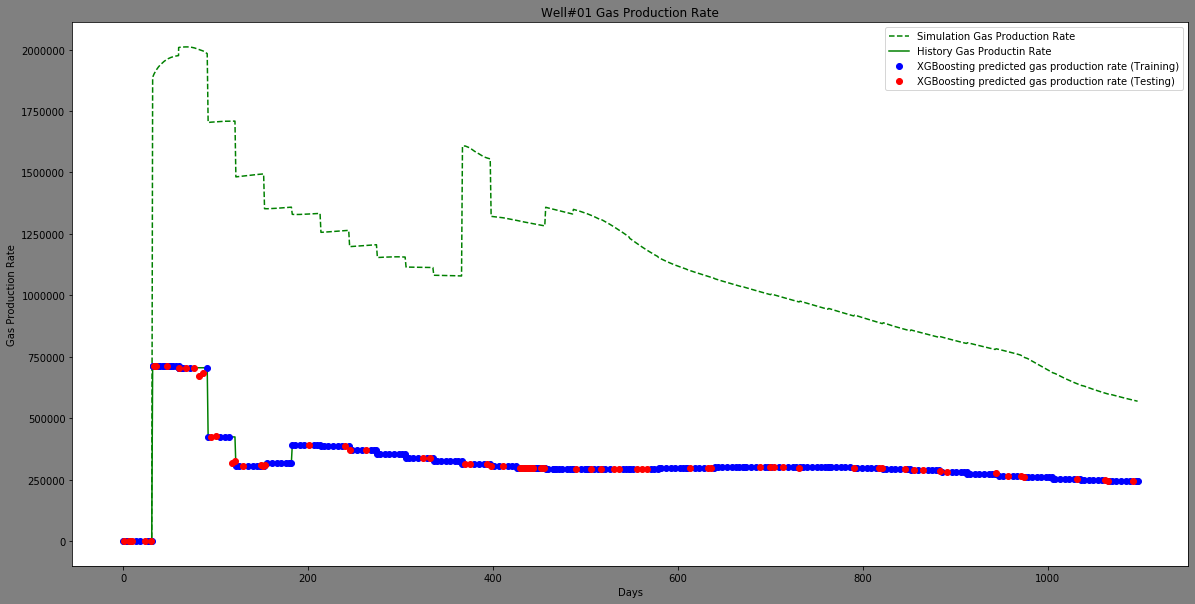

In [447]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =300, learning_rate=0.30000000000000004, num_parallel_tree= 6 ))

model.fit(XGPR_Well01_train, YGPR_Well01_train)
print('R² = ' ,model.score(XGPR_Well01_test,  YGPR_Well01_test)* 100, "%")
y_predict_1 = model.predict(XGPR_Well01_train)
y_predict_2 = model.predict(XGPR_Well01_test)

print('error = ', mean_absolute_error(YGPR_Well01_test, y_predict_2))


#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#01 Gas Production Rate')

plt.plot(Time_Well01,GPR0_Well01.iloc[:,0], 'g--')
plt.plot(Time_Well01, GPR0_Well01.iloc[:,1],'g')
plt.plot(Time_Well01_train,y_predict_1,'bo')
plt.plot(Time_Well01_test,y_predict_2,'ro')
plt.legend(['Simulation Gas Production Rate','History Gas Productin Rate',
            'XGBoosting predicted gas production rate (Training)',
            'XGBoosting predicted gas production rate (Testing)'],loc='upper right')


## IV.3. Water Cut

### IV.3.1. Data Load

In [467]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                          # Water Cut Well 01 (Simulation & History)
#--------------------------------------------------------------------------------------------------------------------------------------------#

WCT0_Well01 = Well01_Dataset.drop(['GPRH','GPR','OPRH','OPR','OPTH','OPT','GPTH','GPT','WPTH','WPT'],axis=1)
WCT0_Well01.head()

,WCT,WCTH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,0.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,1.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,4.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,4.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,5.125,0.0,0.0,0.0,414.9260


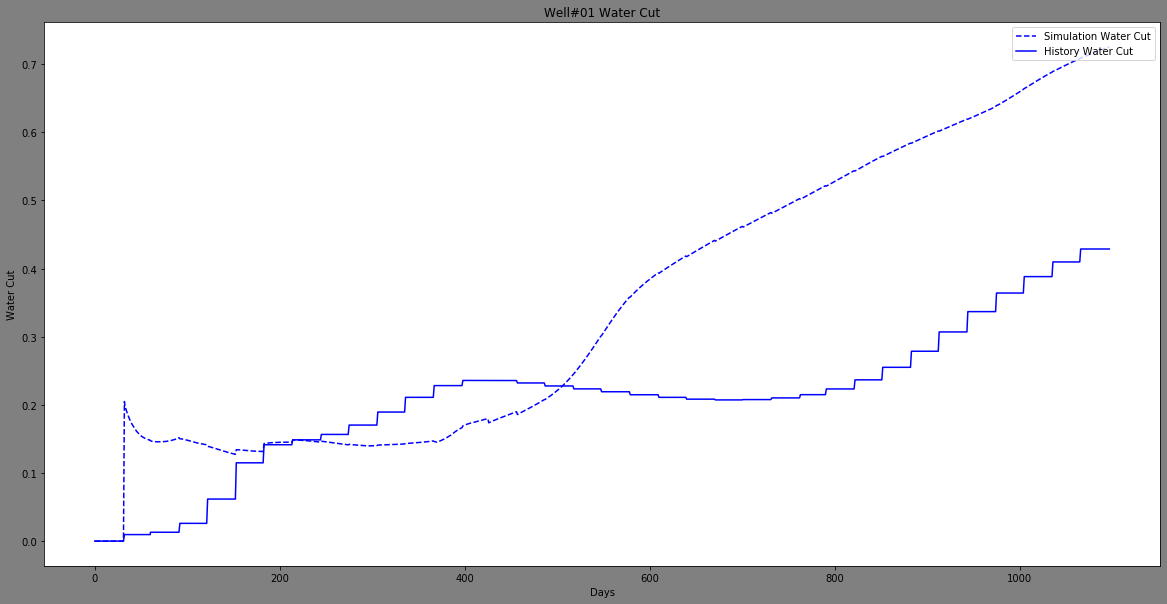

In [305]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#01 Water Cut')
plt.plot(WCT0_Well01.iloc[:,2],WCT0_Well01.iloc[:,0], 'b--',WCT0_Well01.iloc[:,2],WCT0_Well01.iloc[:,1], 'b' )
plt.legend(['Simulation Water Cut','History Water Cut'],loc='upper right')

In [306]:
WCT1_Well01 = WCT0_Well01.drop(['WCT'],axis=1)
WCT1_Well01.head()

,WCTH,Date,BHP,GOR,PI,Temperature
0,0.0,0.000,0.0,0.0,0.0,415.0000
1,0.0,1.000,0.0,0.0,0.0,414.9815
2,0.0,4.000,0.0,0.0,0.0,414.9630
3,0.0,4.500,0.0,0.0,0.0,414.9445
4,0.0,5.125,0.0,0.0,0.0,414.9260


#####  Target y = WCTH   
##### Features X = Date, BHP, GOR, PI, Temperature

In [307]:
Y1_Well01 = WCT1_Well01.iloc[:,0].values
X1_Well01 = WCT1_Well01.iloc[:,1:].values

Y1_Well01 = Y1_Well01.reshape(378,1)


In [308]:
Time_Well01 = WCT1_Well01.iloc[:,1].values
Time_Well01 = Time_Well01.reshape(378,1)

### IV.3.2. Pre-Processing

#### IV.3.2.1. Input feature Selection

In [309]:
selector = SelectKBest(f_regression, k=5)
selector.fit(X1_Well01, Y1_Well01)
selector.scores_


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1745.1419743 ,   53.73260746,   65.08767879,  189.65673741,
       1505.98352095])

In [310]:
selector = SelectKBest(f_regression, k=2)
selector.fit(X1_Well01, Y1_Well01)
selector.scores_
selector.get_support()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True, False, False, False,  True])

##### Final DataSet

In [311]:
WCT_Well01 = WCT1_Well01.drop(['Date','Temperature','GOR'],axis=1)
WCT_Well01.head()

,WCTH,BHP,PI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [312]:
YWCT_Well01 = WCT_Well01.iloc[:,0].values
XWCT_Well01 = WCT_Well01.iloc[:,1:].values
YWCT_Well01 = YWCT_Well01.reshape(378,1)

#### IV.3.2.2. Test_Train_Split 


###### train set : Dont les données sont utilisées pour entraîner le modèle 
###### test set : reservé uniquement à l'évaluation du modèle


In [313]:
XWCT_Well01_train, XWCT_Well01_test, YWCT_Well01_train, YWCT_Well01_test = train_test_split(XWCT_Well01, YWCT_Well01, random_state=0, test_size = 0.2)
Time_Well01_train, Time_Well01_test =train_test_split(Time_Well01, random_state=0, test_size = 0.2)

In [314]:
YWCT_Well01_train = YWCT_Well01_train.reshape(302,1)
YWCT_Well01_test = YWCT_Well01_test.reshape(76,1)

#### IV.3.2.3. Normalization

### * MinMaxScaler

In [315]:
Scaler = MinMaxScaler ()
XWCT_Well01_train_MinMax =Scaler.fit_transform (XWCT_Well01_train)
XWCT_Well01_test_MinMax =Scaler.fit_transform (XWCT_Well01_test)

Time_Well01_test_MinMax =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_MinMax =Scaler.fit_transform (Time_Well01_train)

YWCT_Well01_train_MinMax =Scaler.fit_transform (YWCT_Well01_train)
YWCT_Well01_test_MinMax =Scaler.fit_transform (YWCT_Well01_test)



### * StandardScaler

In [316]:
Scaler = StandardScaler()
XWCT_Well01_train_Std =Scaler.fit_transform (XWCT_Well01_train)
XWCT_Well01_test_Std =Scaler.fit_transform (XWCT_Well01_test)

Time_Well01_test_Std =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_Std =Scaler.fit_transform (Time_Well01_train)

YWCT_Well01_train_Std =Scaler.fit_transform (YWCT_Well01_train)
YWCT_Well01_test_Std =Scaler.fit_transform (YWCT_Well01_test)

### * RobustScaler

In [317]:
Scaler = RobustScaler()
XWCT_Well01_train_Robust =Scaler.fit_transform (XWCT_Well01_train)
XWCT_Well01_test_Robust =Scaler.fit_transform (XWCT_Well01_test)

Time_Well01_test_Robust =Scaler.fit_transform (Time_Well01_test)
Time_Well01_train_Robust =Scaler.fit_transform (Time_Well01_train)

YWCT_Well01_train_Robust =Scaler.fit_transform (YWCT_Well01_train)
YWCT_Well01_test_Robust=Scaler.fit_transform (YWCT_Well01_test)


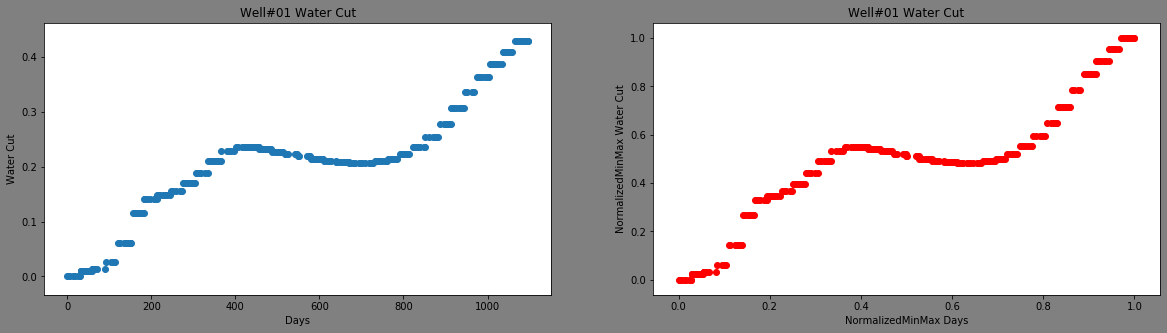

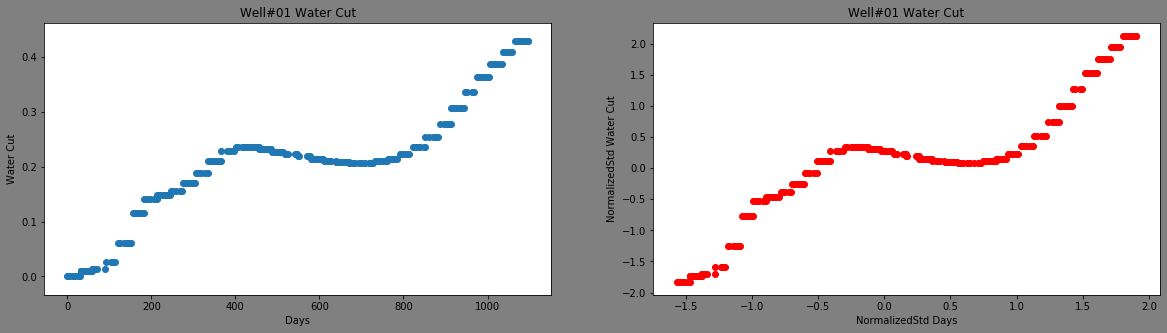

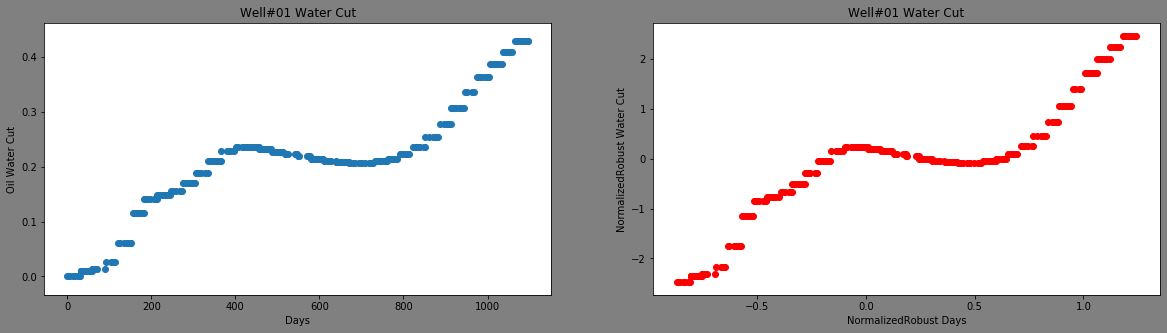

In [318]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#01 Water Cut')
plt.scatter(Time_Well01_train, YWCT_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedMinMax Days'), plt.ylabel('NormalizedMinMax Water Cut'), plt.title('Well#01 Water Cut')
plt.scatter(Time_Well01_train_MinMax, YWCT_Well01_train_MinMax,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#01 Water Cut')
plt.scatter(Time_Well01_train[:,0], YWCT_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedStd Days'), plt.ylabel('NormalizedStd Water Cut'), plt.title('Well#01 Water Cut')
plt.scatter(Time_Well01_train_Std[:,0], YWCT_Well01_train_Std,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Oil Water Cut'), plt.title('Well#01 Water Cut')
plt.scatter(Time_Well01_train[:,0], YWCT_Well01_train)
plt.subplot(122)
plt.xlabel('NormalizedRobust Days'), plt.ylabel('NormalizedRobust Water Cut'), plt.title('Well#01 Water Cut')
plt.scatter(Time_Well01_train_Robust[:,0], YWCT_Well01_train_Robust,c = 'r')

{'whiskers': [<matplotlib.lines.Line2D at 0x251c6fc85c8>,
 'caps': [<matplotlib.lines.Line2D at 0x251c85adcc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c85a9948>],
 'medians': [<matplotlib.lines.Line2D at 0x251c85b1c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c85b6ac8>],
 'means': []}

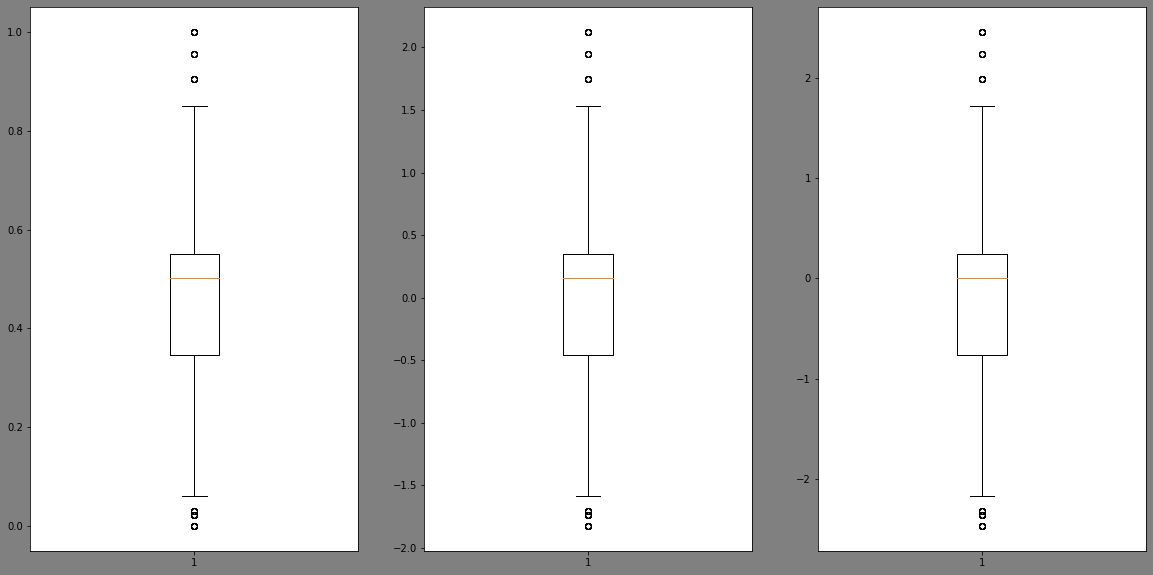

In [319]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.subplot(131)
plt.boxplot(YWCT_Well01_train_MinMax)
plt.subplot(132)
plt.boxplot(YWCT_Well01_train_Std)
plt.subplot(133)
plt.boxplot(YWCT_Well01_train_Robust)

### --> On choisit la normalisation Robust car la boite à moustache est plus centré 

### IV.3.3. Entraînement du modèle 

In [331]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =20, learning_rate=0.1))

model.fit(XWCT_Well01_train, YWCT_Well01_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=20, n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_meth

In [332]:
print('R² = ' ,model.score(XWCT_Well01_test,  YWCT_Well01_test)* 100, "%")

R² =  82.72226934088742 %


In [333]:
y_predict_1 = model.predict(XWCT_Well01_train)
y_predict_2 = model.predict(XWCT_Well01_test)

print('error = ', mean_absolute_error(YWCT_Well01_test, y_predict_2))

error =  0.042582598317805656


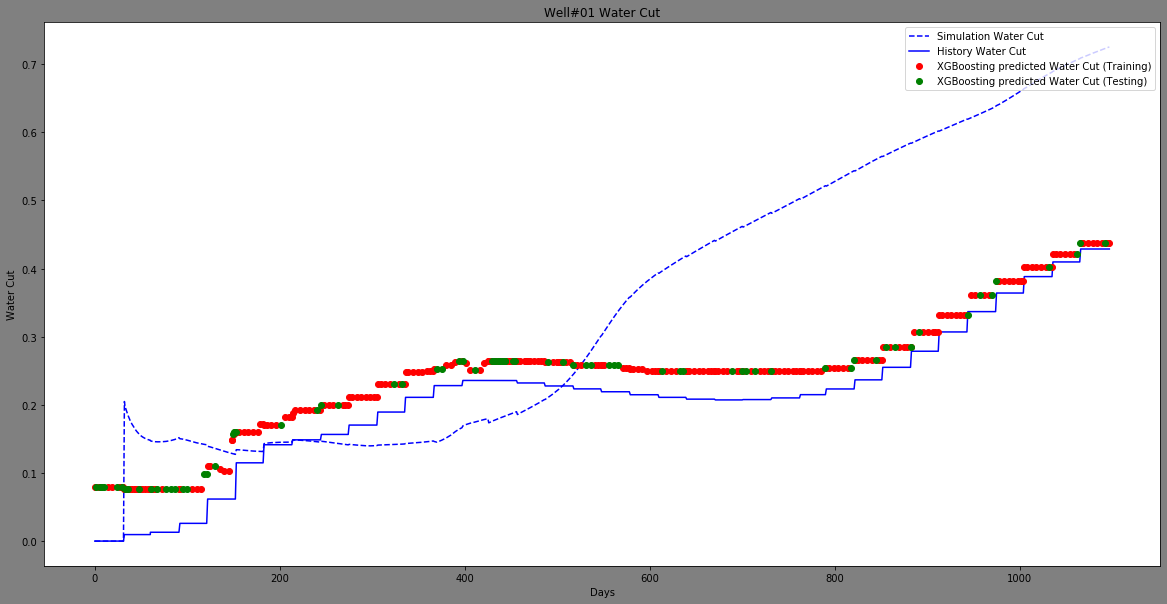

In [334]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#01 Water Cut')

plt.plot(Time_Well01,WCT0_Well01.iloc[:,0], 'b--')
plt.plot(Time_Well01, WCT0_Well01.iloc[:,1],'b')
plt.plot(Time_Well01_train,y_predict_1,'ro')
plt.plot(Time_Well01_test,y_predict_2,'go')
plt.legend(['Simulation Water Cut','History Water Cut',
            'XGBoosting predicted Water Cut (Training)',
            'XGBoosting predicted Water Cut (Testing)'],loc='upper right')

### IV.3.4. Validation du modèle

In [335]:
model = XGBRegressor()
cross_val_score(XGBRegressor(n_estimators = 20), XWCT_Well01_train, YWCT_Well01_train, cv=5).mean()

0.9816399197833844

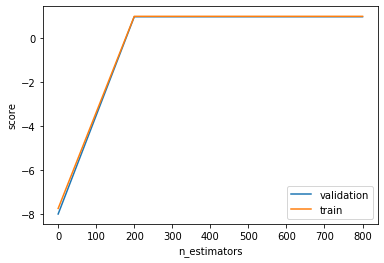

In [336]:
model = XGBRegressor()
k = np.arange(0, 1000, 200)

train_score, val_score = validation_curve(model, XWCT_Well01_train, YWCT_Well01_train,
                                          'n_estimators', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

### --> n_estimators = 200 !!

### IV.3.5. Amélioration du modèle

In [86]:
param_grid = {'n_estimators': np.arange(0, 1000,100),
              'learning_rate' : np.arange(0,1,0.1), 
              'num_parallel_tree': np.arange(1,10,1),
              'random_state' :np.arange(0,100,10)
             }
grid = GridSearchCV(XGBRegressor(),param_grid,cv=5)
grid.fit(XWCT_Well01_train, YWCT_Well01_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': 

In [337]:
print("Best R²= %f using %s" % (grid.best_score_, grid.best_params_))

Best R²= 0.877663 using {'learning_rate': 0.30000000000000004, 'n_estimators': 50, 'num_parallel_tree': 6, 'random_state': 0}


#### --> C'est fini ! Le modèle de machine learning est prêt à être utilisé 

### IV.3.6. Visualation des résultats

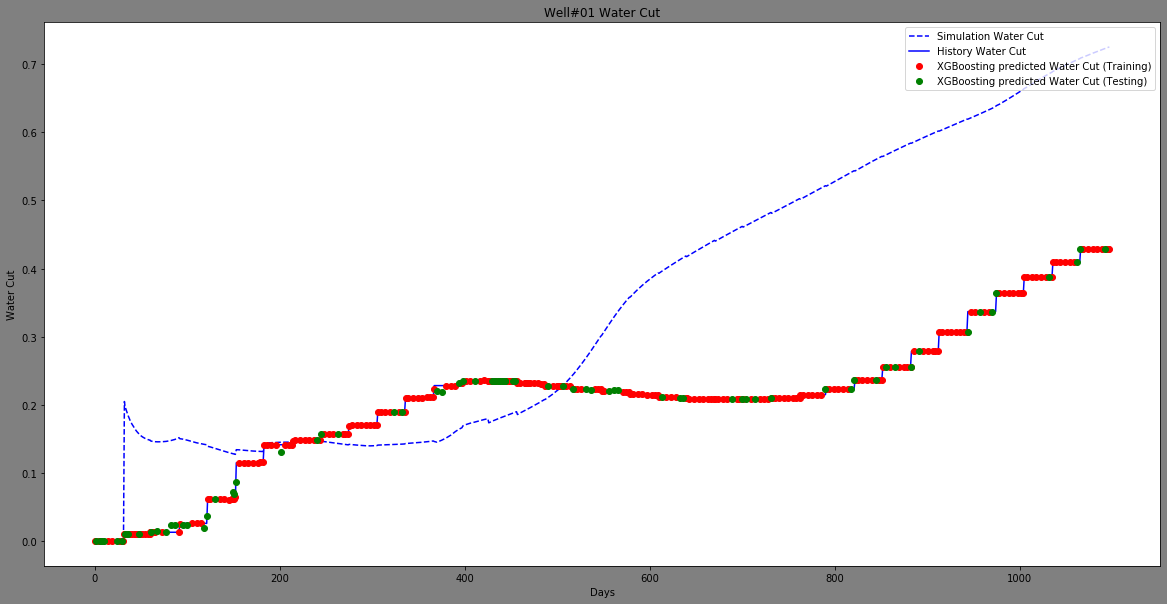

In [338]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =100, learning_rate = 0.1, num_parallel_tree= 1 ))

model.fit(XWCT_Well01_train, YWCT_Well01_train)
y_predict_1 = model.predict(XWCT_Well01_train)
y_predict_2 = model.predict(XWCT_Well01_test)


#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#01 Water Cut')

plt.plot(Time_Well01,WCT0_Well01.iloc[:,0], 'b--')
plt.plot(Time_Well01, WCT0_Well01.iloc[:,1],'b')
plt.plot(Time_Well01_train,y_predict_1,'ro')
plt.plot(Time_Well01_test,y_predict_2,'go')
plt.legend(['Simulation Water Cut','History Water Cut',
            'XGBoosting predicted Water Cut (Training)',
            'XGBoosting predicted Water Cut (Testing)'],loc='upper right')


# V. History Matching (Well#03)

## V.1. Oil Production Rate

In [345]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                  # Well 03 DataSet
#--------------------------------------------------------------------------------------------------------------------------------------------#

Well03_Dataset=pd.read_csv("Well03_Dataset.csv")
Well03_Dataset.head()

,OPR,OPRH,GPR,GPRH,WCT,WCTH,OPT,OPTH,GPT,GPTH,WPT,WPTH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36526.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36527.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36530.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36530.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36531.125,0.0,0.0,0.0,414.9260


### V.1.1. Data Load

In [346]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                          # Oil Production Rate Well 03 (Simulation & History)
#--------------------------------------------------------------------------------------------------------------------------------------------#

OPR0_Well03 = Well03_Dataset.drop(['GPRH','GPR','WCTH','WCT','OPTH','OPT','GPTH','GPT','WPTH','WPT'],axis=1)
OPR0_Well03.head()

,OPR,OPRH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,36526.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,36527.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,36530.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,36530.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,36531.125,0.0,0.0,0.0,414.9260


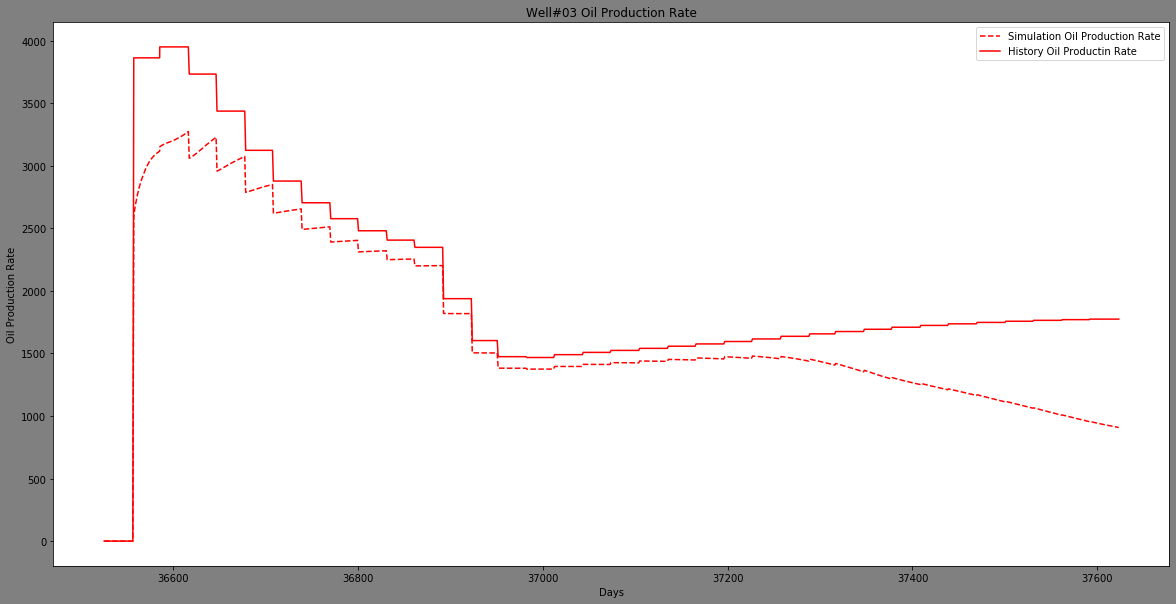

In [367]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#03 Oil Production Rate')
plt.plot(OPR0_Well03.iloc[:,2],OPR0_Well03.iloc[:,0], 'r--',OPR0_Well03.iloc[:,2],OPR0_Well03.iloc[:,1], 'r' )
plt.legend(['Simulation Oil Production Rate','History Oil Productin Rate'],loc='upper right')

In [348]:
OPR1_Well03 = OPR0_Well03.drop(['OPR'],axis=1)
OPR1_Well03.head()

,OPRH,Date,BHP,GOR,PI,Temperature
0,0.0,36526.000,0.0,0.0,0.0,415.0000
1,0.0,36527.000,0.0,0.0,0.0,414.9815
2,0.0,36530.000,0.0,0.0,0.0,414.9630
3,0.0,36530.500,0.0,0.0,0.0,414.9445
4,0.0,36531.125,0.0,0.0,0.0,414.9260


#####  Target y = OPRH  
##### Features X = Date, BHP, GOR, PI, Temperature

In [349]:
Y1_Well03 = OPR1_Well03.iloc[:,0].values
X1_Well03 = OPR1_Well03.iloc[:,1:].values

Y1_Well03 = Y1_Well03.reshape(378,1)


In [350]:
Time_Well03 = OPR1_Well03.iloc[:,1].values
Time_Well0 = Time_Well03.reshape(378,1)

### V.1.2. Pre-Processing

#### V.1.2.1. Input feature Selection

In [351]:
selector = SelectKBest(f_regression, k=5)
selector.fit(X1_Well03, Y1_Well03)
selector.scores_

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 98.21864875,   8.92109897, 115.87434464,  30.01378755,
        98.61865843])

In [352]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X1_Well03, Y1_Well03)
selector.scores_
selector.get_support()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True, False,  True, False,  True])

##### Final DataSet

In [353]:
OPR_Well03 = OPR1_Well03.drop(['Date','Temperature'],axis=1)
OPR_Well03.head()

,OPRH,BHP,GOR,PI
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [354]:
YOPR_Well03 = OPR_Well03.iloc[:,0].values
XOPR_Well03 = OPR_Well03.iloc[:,1:].values
YOPR_Well03 = YOPR_Well03.reshape(378,1)

#### IV.1.2.2. Test_Train_Split 


###### train set : Dont les données sont utilisées pour entraîner le modèle 
###### test set : reservé uniquement à l'évaluation du modèle


In [355]:
XOPR_Well03_train, XOPR_Well03_test, YOPR_Well03_train, YOPR_Well03_test = train_test_split(XOPR_Well03, YOPR_Well03, random_state=0, test_size = 0.2)
Time_Well03_train, Time_Well03_test =train_test_split(Time_Well03, random_state=0, test_size = 0.2)

In [356]:
YOPR_Well03_train = YOPR_Well03_train.reshape(302,1)
YOPR_Well03_test = YOPR_Well03_test.reshape(76,1)
Time_Well03_train=Time_Well03_train.reshape(302,1)
Time_Well03_test=Time_Well03_test.reshape(76,1)


#### IV.1.2.3. Normalization

### * MinMaxScaler

In [357]:
Scaler = MinMaxScaler ()
XOPR_Well03_train_MinMax =Scaler.fit_transform (XOPR_Well03_train)
XOPR_Well03_test_MinMax =Scaler.fit_transform (XOPR_Well03_test)

Time_Well03_test_MinMax =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_MinMax =Scaler.fit_transform (Time_Well03_train)

YOPR_Well03_train_MinMax =Scaler.fit_transform (YOPR_Well03_train)
YOPR_Well03_test_MinMax =Scaler.fit_transform (YOPR_Well03_test)



### * StandardScaler

In [358]:
Scaler = StandardScaler()
XOPR_Well03_train_Std =Scaler.fit_transform (XOPR_Well03_train)
XOPR_Well03_test_Std =Scaler.fit_transform (XOPR_Well03_test)

Time_Well03_test_Std =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_Std =Scaler.fit_transform (Time_Well03_train)

YOPR_Well03_train_Std =Scaler.fit_transform (YOPR_Well03_train)
YOPR_Well03_test_Std =Scaler.fit_transform (YOPR_Well03_test)

### * RobustScaler

In [359]:
Scaler = RobustScaler()
XOPR_Well03_train_Robust =Scaler.fit_transform (XOPR_Well03_train)
XOPR_Well03_test_Robust =Scaler.fit_transform (XOPR_Well03_test)

Time_Well03_test_Robust =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_Robust =Scaler.fit_transform (Time_Well03_train)

YOPR_Well03_train_Robust =Scaler.fit_transform (YOPR_Well03_train)
YOPR_Well03_test_Robust=Scaler.fit_transform (YOPR_Well03_test)


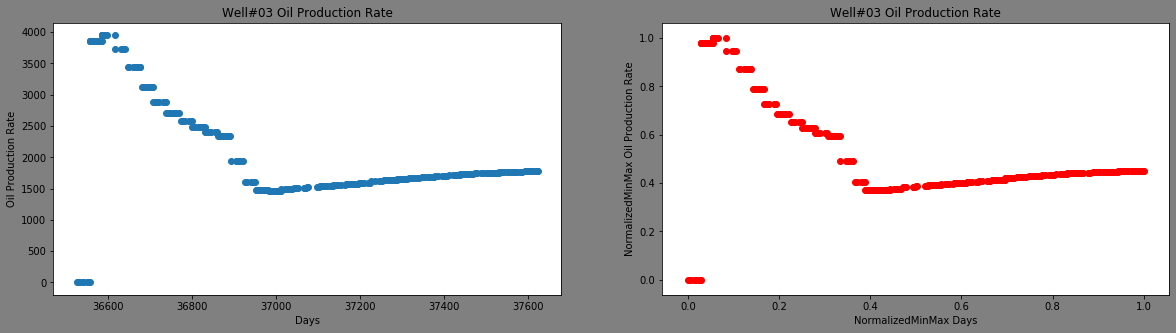

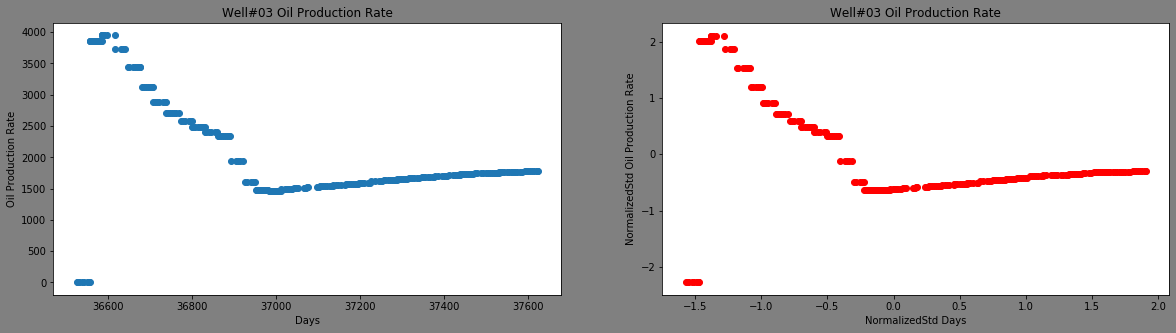

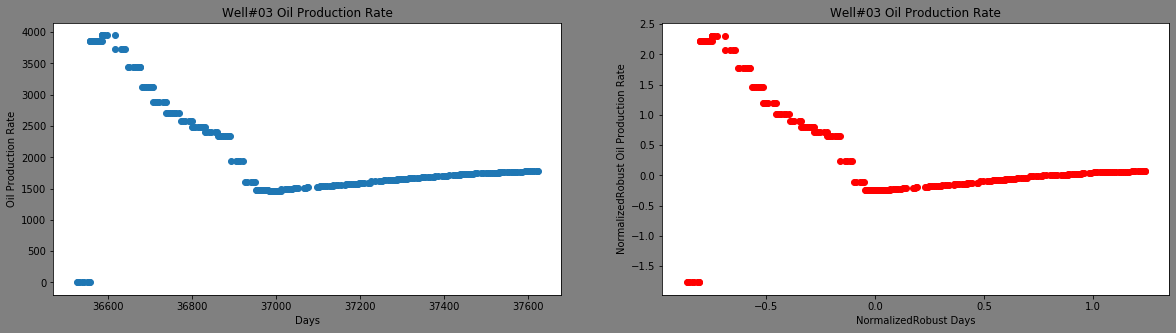

In [368]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#03 Oil Production Rate')
plt.scatter(Time_Well03_train, YOPR_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedMinMax Days'), plt.ylabel('NormalizedMinMax Oil Production Rate'), plt.title('Well#03 Oil Production Rate')
plt.scatter(Time_Well03_train_MinMax, YOPR_Well03_train_MinMax,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#03 Oil Production Rate')
plt.scatter(Time_Well03_train[:,0], YOPR_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedStd Days'), plt.ylabel('NormalizedStd Oil Production Rate'), plt.title('Well#03 Oil Production Rate')
plt.scatter(Time_Well03_train_Std[:,0], YOPR_Well03_train_Std,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#03 Oil Production Rate')
plt.scatter(Time_Well03_train[:,0], YOPR_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedRobust Days'), plt.ylabel('NormalizedRobust Oil Production Rate'), plt.title('Well#03 Oil Production Rate')
plt.scatter(Time_Well03_train_Robust[:,0], YOPR_Well03_train_Robust,c = 'r')

{'whiskers': [<matplotlib.lines.Line2D at 0x251c8b25f88>,
 'caps': [<matplotlib.lines.Line2D at 0x251c8b28f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c8b25688>],
 'medians': [<matplotlib.lines.Line2D at 0x251c8b2ff08>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c8b2ffc8>],
 'means': []}

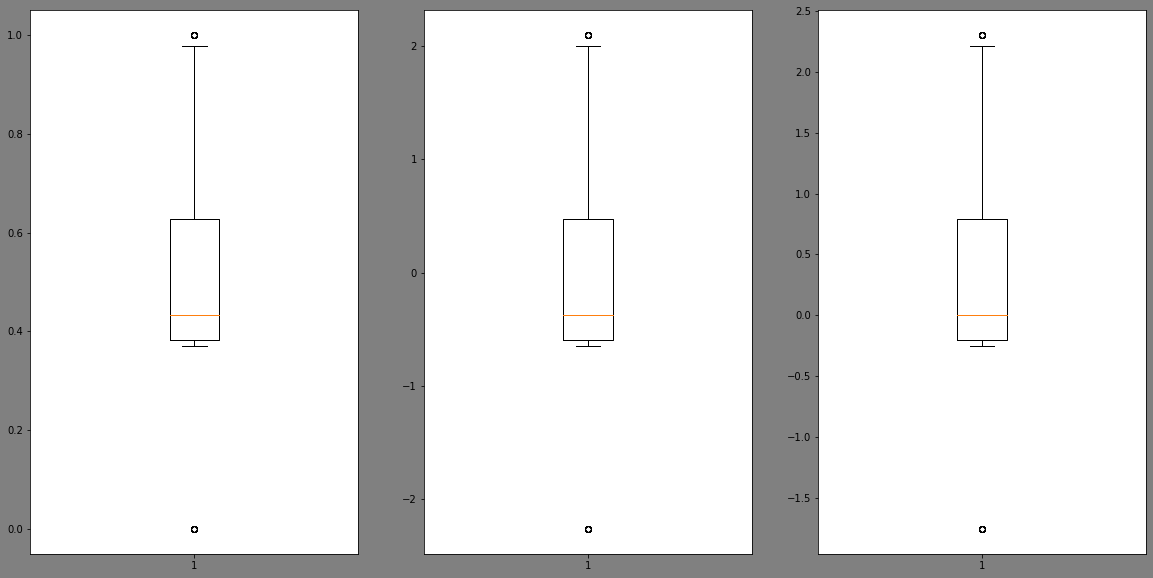

In [369]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.subplot(131)
plt.boxplot(YOPR_Well03_train_MinMax)
plt.subplot(132)
plt.boxplot(YOPR_Well03_train_Std)
plt.subplot(133)
plt.boxplot(YOPR_Well03_train_Robust)

### --> On choisit la normalisation Robust car la boite à moustache est plus centré 

### V.1.3. Entraînement du modèle 

In [370]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =20, learning_rate=0.1))

model.fit(XOPR_Well03_train, YOPR_Well03_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=20, n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_meth

In [371]:
print('R² = ' ,model.score(XOPR_Well03_test,  YOPR_Well03_test)* 100, "%")

R² =  91.7196793662342 %


In [372]:
y_predict_1 = model.predict(XOPR_Well03_train)
y_predict_2 = model.predict(XOPR_Well03_test)

print('error = ', mean_absolute_error(YOPR_Well01_test, y_predict_2))

error =  326.0086905651932


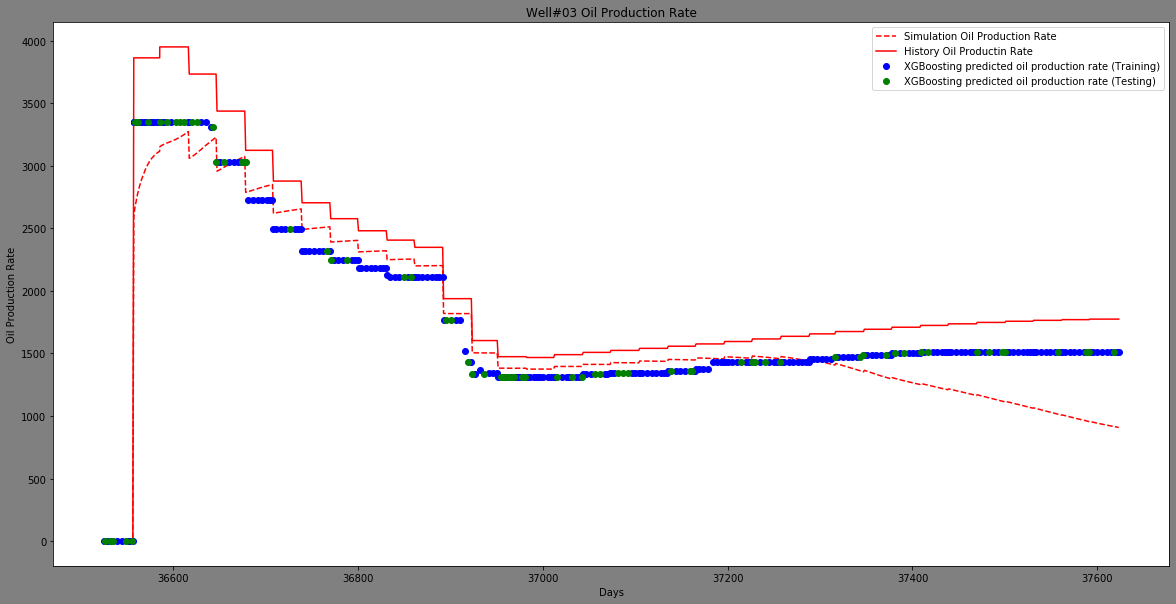

In [373]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#03 Oil Production Rate')

plt.plot(Time_Well03,OPR0_Well03.iloc[:,0], 'r--')
plt.plot(Time_Well03, OPR0_Well03.iloc[:,1],'r')
plt.plot(Time_Well03_train,y_predict_1,'bo')
plt.plot(Time_Well03_test,y_predict_2,'go')
plt.legend(['Simulation Oil Production Rate','History Oil Productin Rate',
            'XGBoosting predicted oil production rate (Training)',
            'XGBoosting predicted oil production rate (Testing)'],loc='upper right')

### V.1.4. Validation du modèle

In [374]:
model = XGBRegressor()
cross_val_score(XGBRegressor(n_estimators = 100), XOPR_Well03_train, YOPR_Well03_train, cv=5).mean()

0.9962021432531308

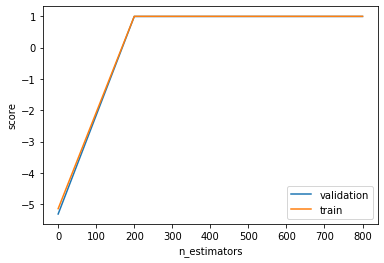

In [375]:
model = XGBRegressor()
k = np.arange(0, 1000, 200)

train_score, val_score = validation_curve(model, XOPR_Well03_train, YOPR_Well03_train,
                                          'n_estimators', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

### --> n_estimators = 200 !!

### V.1.5. Amélioration du modèle

In [377]:
param_grid = {'n_estimators': np.arange(0, 1000,100),
              'learning_rate' : np.arange(0,1,0.1), 
              'num_parallel_tree': np.arange(1,10,1),
              'random_state' :np.arange(0,100, 10)
             }
grid = GridSearchCV(XGBRegressor(),param_grid,cv=5)
grid.fit(XOPR_Well03_train, YOPR_Well03_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0. , 0.5]),
     

In [378]:
print("Best R²= %f using %s" % (grid.best_score_, grid.best_params_))

Best R²= 0.995481 using {'learning_rate': 0.5, 'n_estimators': 100, 'num_parallel_tree': 6, 'random_state': 0}


#### --> C'est fini ! Le modèle de machine learning est prêt à être utilisé 

### V.1.6. Visualation des résultats

R² =  99.66424262757985 %
error =  256.2204358797492


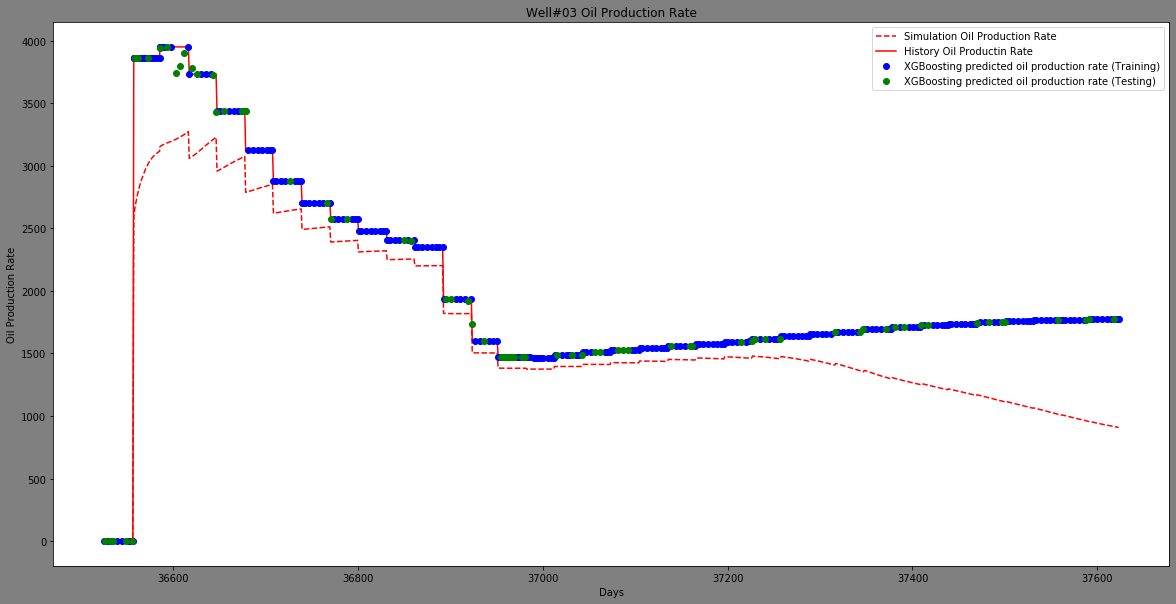

In [379]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =200, learning_rate=0.1, num_parallel_tree= 6 ))

model.fit(XOPR_Well03_train, YOPR_Well03_train)
print('R² = ' ,model.score(XOPR_Well03_test,  YOPR_Well03_test)* 100, "%")
y_predict_3 = model.predict(XOPR_Well03_train)
y_predict_4 = model.predict(XOPR_Well03_test)

print('error = ', mean_absolute_error(YOPR_Well03_test, y_predict_2))


#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Oil Production Rate'), plt.title('Well#03 Oil Production Rate')

plt.plot(Time_Well03,OPR0_Well03.iloc[:,0], 'r--')
plt.plot(Time_Well03, OPR0_Well03.iloc[:,1],'r')
plt.plot(Time_Well03_train,y_predict_3,'bo')
plt.plot(Time_Well03_test,y_predict_4,'go')
plt.legend(['Simulation Oil Production Rate','History Oil Productin Rate',
            'XGBoosting predicted oil production rate (Training)',
            'XGBoosting predicted oil production rate (Testing)'],loc='upper right')


## V.2. GAS PRODUCTION RATE

### V.2.1. Data Load

In [468]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                          # Gas Production Rate Well 03 (Simulation & History)
#--------------------------------------------------------------------------------------------------------------------------------------------#

GPR0_Well03 = Well03_Dataset.drop(['OPRH','OPR','WCTH','WCT','OPTH','OPT','GPTH','GPT','WPTH','WPT'],axis=1)
GPR0_Well03.head()

,GPR,GPRH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,36526.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,36527.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,36530.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,36530.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,36531.125,0.0,0.0,0.0,414.9260


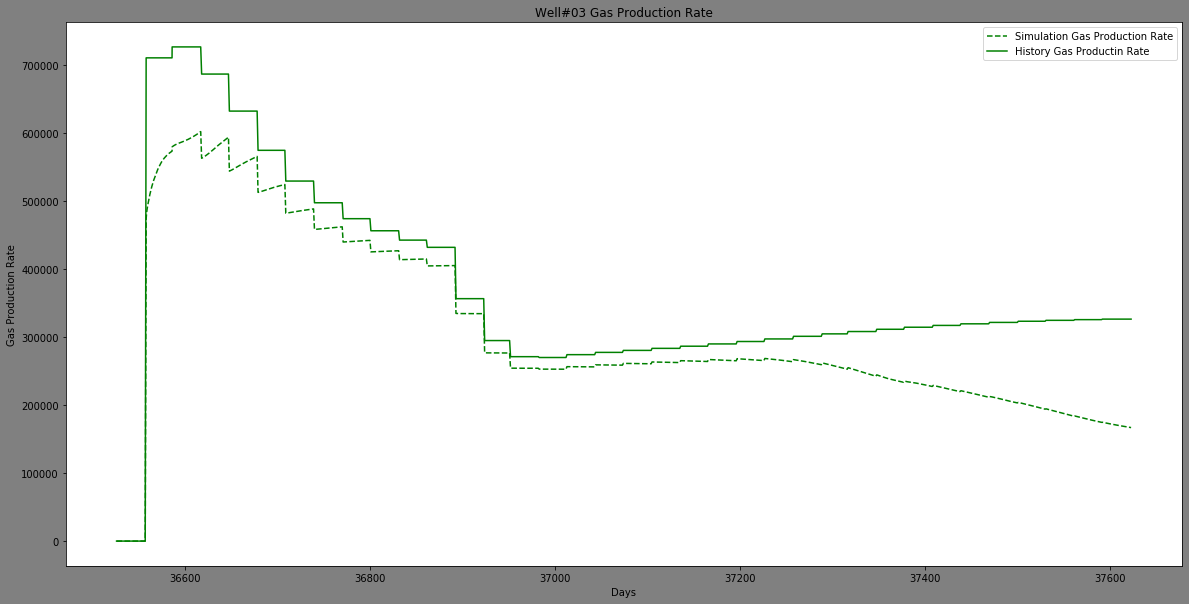

In [381]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#03 Gas Production Rate')
plt.plot(GPR0_Well03.iloc[:,2],GPR0_Well03.iloc[:,0], 'g--',GPR0_Well03.iloc[:,2],GPR0_Well03.iloc[:,1], 'g' )
plt.legend(['Simulation Gas Production Rate','History Gas Productin Rate'],loc='upper right')

In [382]:
GPR1_Well03 = GPR0_Well03.drop(['GPR'],axis=1)
GPR1_Well03.head()

,GPRH,Date,BHP,GOR,PI,Temperature
0,0.0,36526.000,0.0,0.0,0.0,415.0000
1,0.0,36527.000,0.0,0.0,0.0,414.9815
2,0.0,36530.000,0.0,0.0,0.0,414.9630
3,0.0,36530.500,0.0,0.0,0.0,414.9445
4,0.0,36531.125,0.0,0.0,0.0,414.9260


#####  Target y = GPRH  
##### Features X = Date, BHP, GOR, PI, Temperature

In [383]:
Y1_Well03 = GPR1_Well03.iloc[:,0].values
X1_Well03 = GPR1_Well03.iloc[:,1:].values

Y1_Well03 = Y1_Well03.reshape(378,1)


In [384]:
Time_Well03 = GPR1_Well03.iloc[:,1].values
Time_Well03 = Time_Well03.reshape(378,1)

### V.2.2. Pre-Processing

#### V.2.2.1. Input feature Selection

In [385]:
selector = SelectKBest(f_regression, k=5)
selector.fit(X1_Well03, Y1_Well03)
selector.scores_

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 98.21866895,   8.92111357, 115.87439456,  30.01381524,
        98.61867778])

In [386]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X1_Well03, Y1_Well03)
selector.scores_
selector.get_support()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True, False,  True, False,  True])

##### Final DataSet

In [387]:
GPR_Well03 = GPR1_Well03.drop(['Date','Temperature'],axis=1)
GPR_Well03.head()

,GPRH,BHP,GOR,PI
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [388]:
YGPR_Well03 = GPR_Well03.iloc[:,0].values
XGPR_Well03 = GPR_Well03.iloc[:,1:].values
YGPR_Well03 = YGPR_Well03.reshape(378,1)

#### V.2.2.2. Test_Train_Split 


###### train set : Dont les données sont utilisées pour entraîner le modèle 
###### test set : reservé uniquement à l'évaluation du modèle


In [389]:
XGPR_Well03_train, XGPR_Well03_test, YGPR_Well03_train, YGPR_Well03_test = train_test_split(XGPR_Well03, YGPR_Well03, random_state=0, test_size = 0.2)
Time_Well03_train, Time_Well03_test =train_test_split(Time_Well03, random_state=0, test_size = 0.2)

In [390]:
YGPR_Well03_train = YGPR_Well03_train.reshape(302,1)
YGPR_Well03_test = YGPR_Well03_test.reshape(76,1)

#### V.2.2.3. Normalization

### * MinMaxScaler

In [391]:
Scaler = MinMaxScaler ()
XGPR_Well03_train_MinMax =Scaler.fit_transform (XGPR_Well03_train)
XGPR_Well03_test_MinMax =Scaler.fit_transform (XGPR_Well03_test)

Time_Well03_test_MinMax =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_MinMax =Scaler.fit_transform (Time_Well03_train)

YGPR_Well03_train_MinMax =Scaler.fit_transform (YGPR_Well03_train)
YGPR_Well03_test_MinMax =Scaler.fit_transform (YGPR_Well03_test)



### * StandardScaler

In [392]:
Scaler = StandardScaler()
XGPR_Well03_train_Std =Scaler.fit_transform (XGPR_Well03_train)
XGPR_Well03_test_Std =Scaler.fit_transform (XGPR_Well03_test)

Time_Well03_test_Std =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_Std =Scaler.fit_transform (Time_Well03_train)

YGPR_Well03_train_Std =Scaler.fit_transform (YGPR_Well03_train)
YGPR_Well03_test_Std =Scaler.fit_transform (YGPR_Well03_test)

### * RobustScaler

In [393]:
Scaler = RobustScaler()
XGPR_Well03_train_Robust =Scaler.fit_transform (XGPR_Well03_train)
XGPR_Well03_test_Robust =Scaler.fit_transform (XGPR_Well03_test)

Time_Well03_test_Robust =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_Robust =Scaler.fit_transform (Time_Well03_train)

YGPR_Well03_train_Robust =Scaler.fit_transform (YGPR_Well03_train)
YGPR_Well03_test_Robust=Scaler.fit_transform (YGPR_Well03_test)


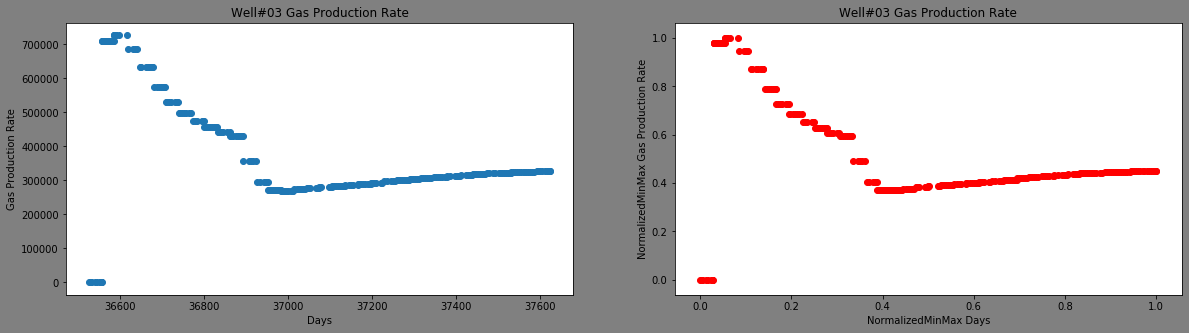

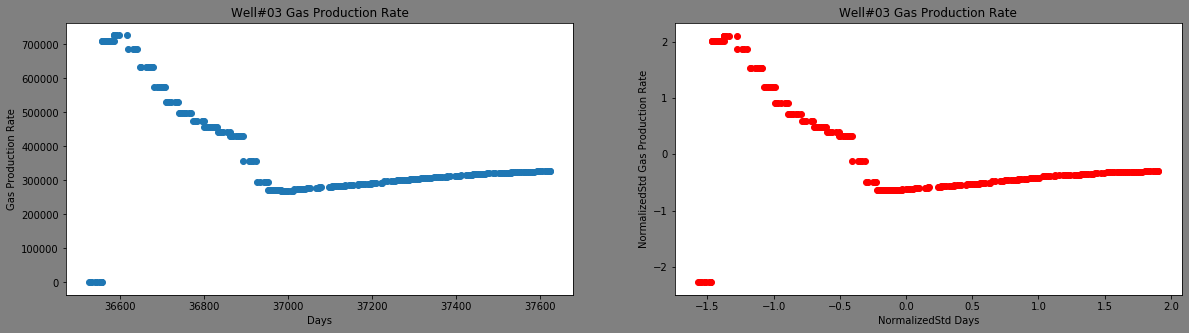

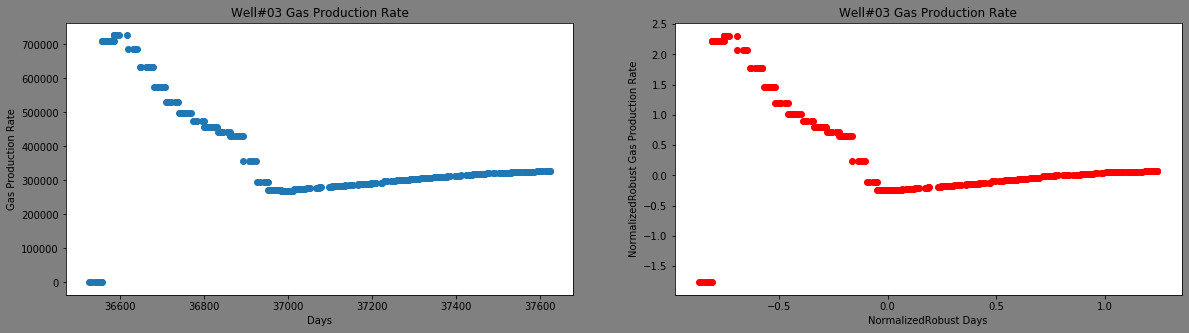

In [394]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#03 Gas Production Rate')
plt.scatter(Time_Well03_train, YGPR_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedMinMax Days'), plt.ylabel('NormalizedMinMax Gas Production Rate'), plt.title('Well#03 Gas Production Rate')
plt.scatter(Time_Well03_train_MinMax, YGPR_Well03_train_MinMax,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#03 Gas Production Rate')
plt.scatter(Time_Well03_train[:,0], YGPR_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedStd Days'), plt.ylabel('NormalizedStd Gas Production Rate'), plt.title('Well#03 Gas Production Rate')
plt.scatter(Time_Well03_train_Std[:,0], YGPR_Well03_train_Std,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#03 Gas Production Rate')
plt.scatter(Time_Well03_train[:,0], YGPR_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedRobust Days'), plt.ylabel('NormalizedRobust Gas Production Rate'), plt.title('Well#03 Gas Production Rate')
plt.scatter(Time_Well03_train_Robust[:,0], YGPR_Well03_train_Robust,c = 'r')

{'whiskers': [<matplotlib.lines.Line2D at 0x251c4b4d188>,
 'caps': [<matplotlib.lines.Line2D at 0x251bd64bfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c48105c8>],
 'medians': [<matplotlib.lines.Line2D at 0x251c484c048>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c4816688>],
 'means': []}

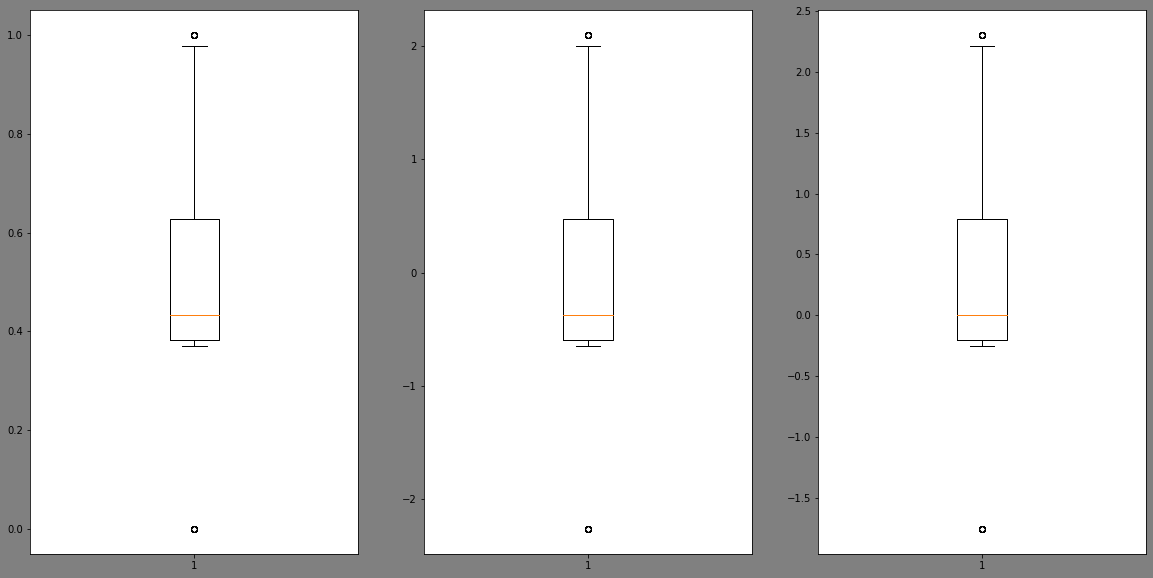

In [395]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.subplot(131)
plt.boxplot(YGPR_Well03_train_MinMax)
plt.subplot(132)
plt.boxplot(YGPR_Well03_train_Std)
plt.subplot(133)
plt.boxplot(YGPR_Well03_train_Robust)

### --> On choisit Robust car boite à moustache est plus centré 

### V.2.3. Entraînement du modèle 

In [396]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =20, learning_rate=0.1))

model.fit(XGPR_Well03_train, YGPR_Well03_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=20, n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_meth

In [397]:
print('R² = ' ,model.score(XGPR_Well03_test,  YGPR_Well03_test)* 100, "%")

R² =  91.71670531784922 %


In [398]:
y_predict_1 = model.predict(XGPR_Well03_train)
y_predict_2 = model.predict(XGPR_Well03_test)

print('error = ', mean_absolute_error(YGPR_Well01_test, y_predict_2))

error =  59987.673957661405


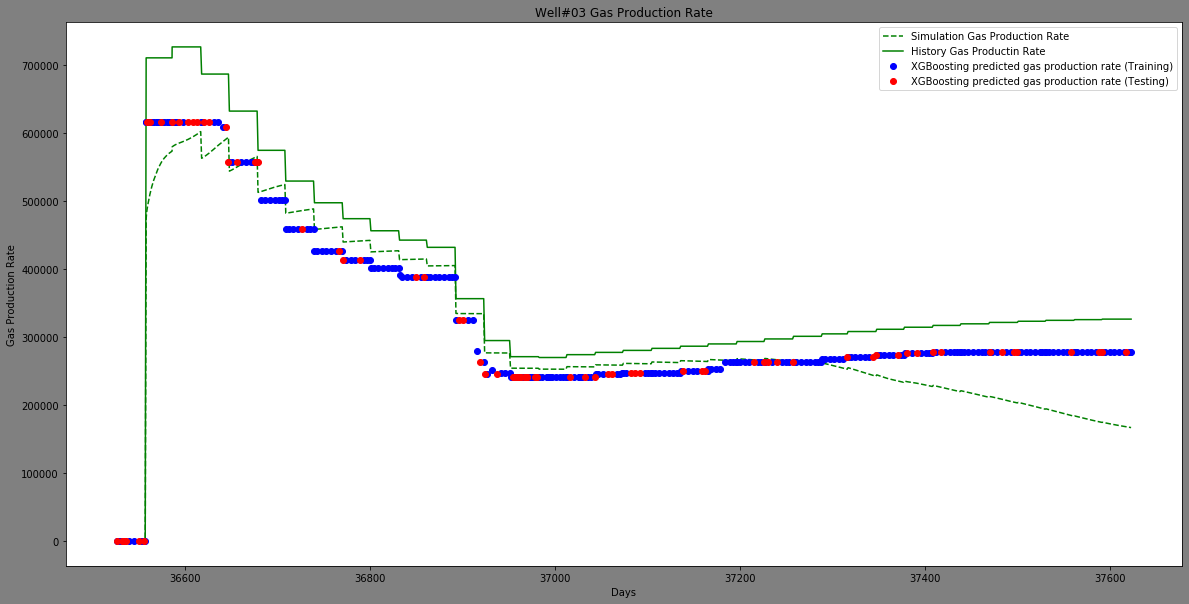

In [399]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#03 Gas Production Rate')

plt.plot(Time_Well03,GPR0_Well03.iloc[:,0], 'g--')
plt.plot(Time_Well03, GPR0_Well03.iloc[:,1],'g')
plt.plot(Time_Well03_train,y_predict_1,'bo')
plt.plot(Time_Well03_test,y_predict_2,'ro')
plt.legend(['Simulation Gas Production Rate','History Gas Productin Rate',
            'XGBoosting predicted gas production rate (Training)',
            'XGBoosting predicted gas production rate (Testing)'],loc='upper right')

### V.2.4. Validation du modèle

In [400]:
model = XGBRegressor()
cross_val_score(XGBRegressor(n_estimators = 20), XGPR_Well03_train, YGPR_Well03_train, cv=5).mean()

0.9961505413926897

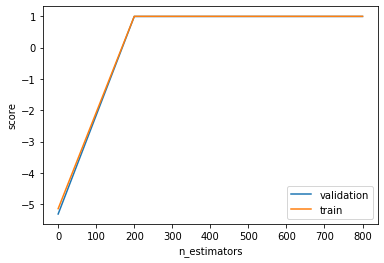

In [401]:
model = XGBRegressor()
k = np.arange(0, 1000, 200)

train_score, val_score = validation_curve(model, XGPR_Well03_train, YGPR_Well03_train,
                                          'n_estimators', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

### --> n_estimators = 300 !!

### V.2.5. Amélioration du modèle

In [402]:
param_grid = {'n_estimators': np.arange(0, 1000,100),
              'learning_rate' : np.arange(0,1,0.1), 
              'num_parallel_tree': np.arange(1,10,1),
              'random_state' :np.arange(0,100, 10)
             }
grid = GridSearchCV(XGBRegressor(),param_grid,cv=5)
grid.fit(XGPR_Well03_train, YGPR_Well03_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0. , 0.5]),
     

In [403]:
print("Best R²= %f using %s" % (grid.best_score_, grid.best_params_))

Best R²= 0.995486 using {'learning_rate': 0.5, 'n_estimators': 200, 'num_parallel_tree': 6, 'random_state': 0}


#### --> C'est fini ! Le modèle de machine learning est prêt à être utilisé 

### V.2.6. Visualation des résultats

R² =  99.69342962980434 %
error =  3162.2330214701324


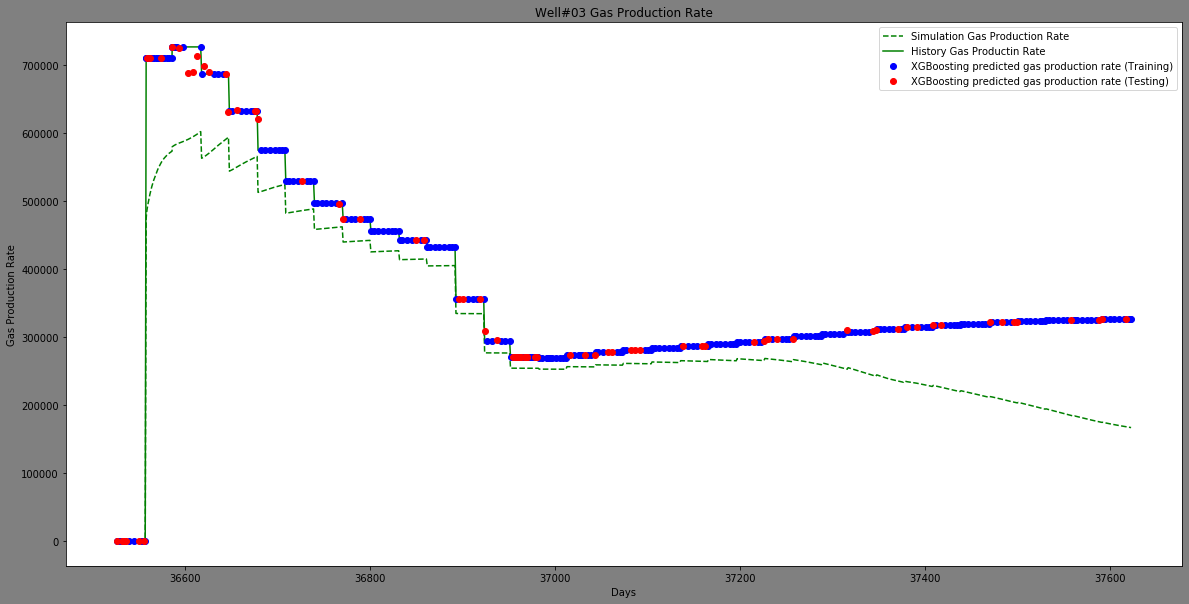

In [406]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =300, learning_rate=0.30000000000000004, num_parallel_tree= 6 ))

model.fit(XGPR_Well03_train, YGPR_Well03_train)
print('R² = ' ,model.score(XGPR_Well03_test,  YGPR_Well03_test)* 100, "%")
y_predict_1 = model.predict(XGPR_Well03_train)
y_predict_2 = model.predict(XGPR_Well03_test)

print('error = ', mean_absolute_error(YGPR_Well03_test, y_predict_2))


#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Gas Production Rate'), plt.title('Well#03 Gas Production Rate')

plt.plot(Time_Well03,GPR0_Well03.iloc[:,0], 'g--')
plt.plot(Time_Well03, GPR0_Well03.iloc[:,1],'g')
plt.plot(Time_Well03_train,y_predict_1,'bo')
plt.plot(Time_Well03_test,y_predict_2,'ro')
plt.legend(['Simulation Gas Production Rate','History Gas Productin Rate',
            'XGBoosting predicted gas production rate (Training)',
            'XGBoosting predicted gas production rate (Testing)'],loc='upper right')


## V.3. Water Cut

### V.3.1. Data Load

In [407]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                          # Water Cut Well 03 (Simulation & History)
#--------------------------------------------------------------------------------------------------------------------------------------------#

WCT0_Well03 = Well03_Dataset.drop(['GPRH','GPR','OPRH','OPR','OPTH','OPT','GPTH','GPT','WPTH','WPT'],axis=1)
WCT0_Well03.head()

,WCT,WCTH,Date,BHP,GOR,PI,Temperature
0,0.0,0.0,36526.000,0.0,0.0,0.0,415.0000
1,0.0,0.0,36527.000,0.0,0.0,0.0,414.9815
2,0.0,0.0,36530.000,0.0,0.0,0.0,414.9630
3,0.0,0.0,36530.500,0.0,0.0,0.0,414.9445
4,0.0,0.0,36531.125,0.0,0.0,0.0,414.9260


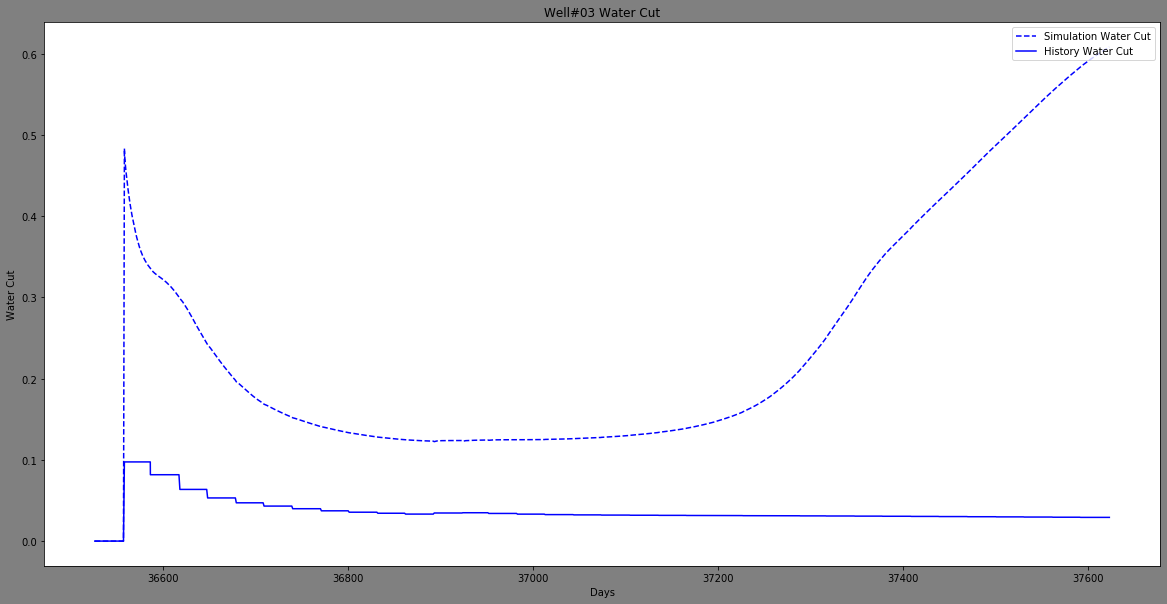

In [422]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#03 Water Cut')
plt.plot(WCT0_Well03.iloc[:,2],WCT0_Well03.iloc[:,0], 'b--',WCT0_Well03.iloc[:,2],WCT0_Well03.iloc[:,1], 'b' )
plt.legend(['Simulation Water Cut','History Water Cut'],loc='upper right')

In [423]:
WCT1_Well03 = WCT0_Well03.drop(['WCT'],axis=1)
WCT1_Well03.head()

,WCTH,Date,BHP,GOR,PI,Temperature
0,0.0,36526.000,0.0,0.0,0.0,415.0000
1,0.0,36527.000,0.0,0.0,0.0,414.9815
2,0.0,36530.000,0.0,0.0,0.0,414.9630
3,0.0,36530.500,0.0,0.0,0.0,414.9445
4,0.0,36531.125,0.0,0.0,0.0,414.9260


#####  Target y = WCTH   
##### Features X = Date, BHP, GOR, PI, Temperature

In [424]:
Y1_Well03 = WCT1_Well03.iloc[:,0].values
X1_Well03 = WCT1_Well03.iloc[:,1:].values

Y1_Well03 = Y1_Well03.reshape(378,1)


In [425]:
Time_Well03 = WCT1_Well03.iloc[:,1].values
Time_Well03 = Time_Well03.reshape(378,1)

### V.3.2. Pre-Processing

#### V.3.2.1. Input feature Selection

In [426]:
selector = SelectKBest(f_regression, k=5)
selector.fit(X1_Well03, Y1_Well03)
selector.scores_


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([111.63584374,  19.72027841,  80.47555978,  28.16722393,
       106.53152497])

In [427]:
selector = SelectKBest(f_regression, k=2)
selector.fit(X1_Well03, Y1_Well03)
selector.scores_
selector.get_support()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True, False, False, False,  True])

### Final DataSet

In [428]:
WCT_Well03 = WCT1_Well03.drop(['Date','Temperature','GOR'],axis=1)
WCT_Well03.head()

,WCTH,BHP,PI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [429]:
YWCT_Well03 = WCT_Well03.iloc[:,0].values
XWCT_Well03 = WCT_Well03.iloc[:,1:].values
YWCT_Well03 = YWCT_Well03.reshape(378,1)

### V.3.2.2. Test_Train_Split 


###### train set : Dont les données sont utilisées pour entraîner le modèle 
###### test set : reservé uniquement à l'évaluation du modèle


In [430]:
XWCT_Well03_train, XWCT_Well03_test, YWCT_Well03_train, YWCT_Well03_test = train_test_split(XWCT_Well03, YWCT_Well03, random_state=0, test_size = 0.2)
Time_Well03_train, Time_Well03_test =train_test_split(Time_Well03, random_state=0, test_size = 0.2)

In [431]:
YWCT_Well03_train = YWCT_Well03_train.reshape(302,1)
YWCT_Well03_test = YWCT_Well03_test.reshape(76,1)

#### V.3.2.3. Normalization

### * MinMaxScaler

In [432]:
Scaler = MinMaxScaler ()
XWCT_Well03_train_MinMax =Scaler.fit_transform (XWCT_Well03_train)
XWCT_Well03_test_MinMax =Scaler.fit_transform (XWCT_Well03_test)

Time_Well03_test_MinMax =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_MinMax =Scaler.fit_transform (Time_Well03_train)

YWCT_Well03_train_MinMax =Scaler.fit_transform (YWCT_Well03_train)
YWCT_Well03_test_MinMax =Scaler.fit_transform (YWCT_Well03_test)



### * StandardScaler

In [433]:
Scaler = StandardScaler()
XWCT_Well03_train_Std =Scaler.fit_transform (XWCT_Well03_train)
XWCT_Well03_test_Std =Scaler.fit_transform (XWCT_Well03_test)

Time_Well03_test_Std =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_Std =Scaler.fit_transform (Time_Well03_train)

YWCT_Well03_train_Std =Scaler.fit_transform (YWCT_Well03_train)
YWCT_Well03_test_Std =Scaler.fit_transform (YWCT_Well03_test)

### * RobustScaler

In [434]:
Scaler = RobustScaler()
XWCT_Well03_train_Robust =Scaler.fit_transform (XWCT_Well03_train)
XWCT_Well03_test_Robust =Scaler.fit_transform (XWCT_Well03_test)

Time_Well03_test_Robust =Scaler.fit_transform (Time_Well03_test)
Time_Well03_train_Robust =Scaler.fit_transform (Time_Well03_train)

YWCT_Well03_train_Robust =Scaler.fit_transform (YWCT_Well03_train)
YWCT_Well03_test_Robust=Scaler.fit_transform (YWCT_Well03_test)


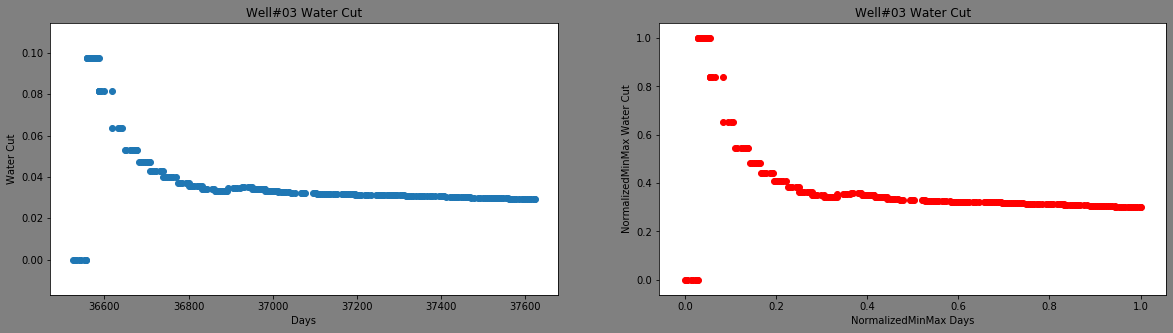

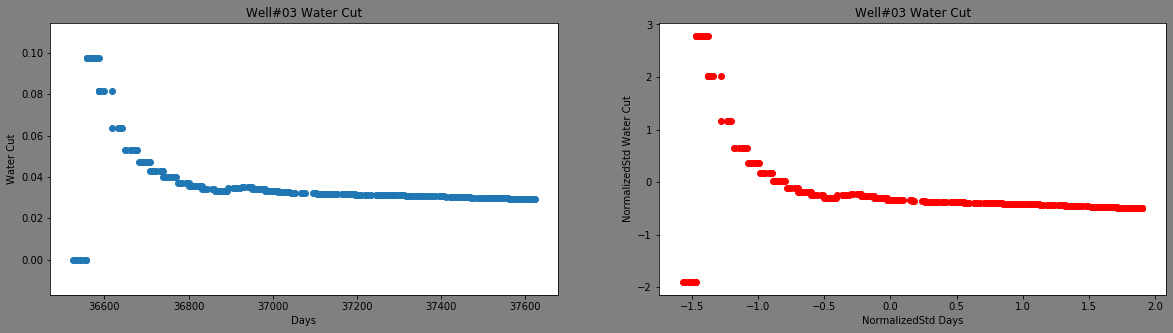

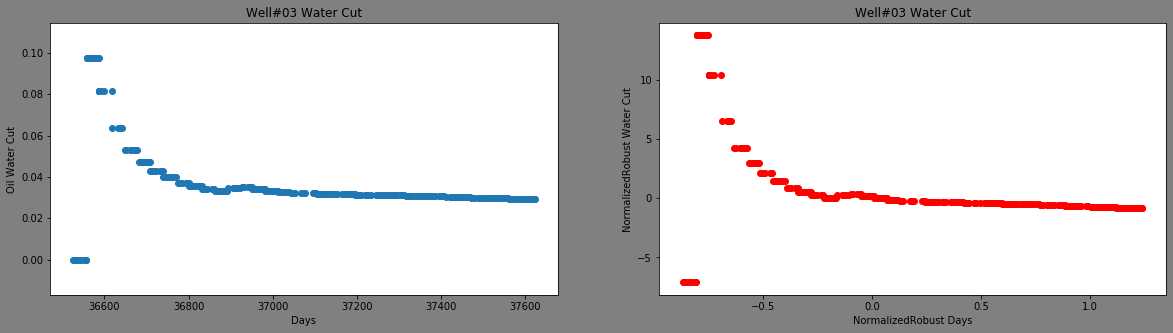

In [435]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#03 Water Cut')
plt.scatter(Time_Well03_train, YWCT_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedMinMax Days'), plt.ylabel('NormalizedMinMax Water Cut'), plt.title('Well#03 Water Cut')
plt.scatter(Time_Well03_train_MinMax, YWCT_Well03_train_MinMax,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#03 Water Cut')
plt.scatter(Time_Well03_train[:,0], YWCT_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedStd Days'), plt.ylabel('NormalizedStd Water Cut'), plt.title('Well#03 Water Cut')
plt.scatter(Time_Well03_train_Std[:,0], YWCT_Well03_train_Std,c = 'r')

plt.figure(figsize=(20,5), facecolor ='grey')
plt.subplot(121)
plt.xlabel('Days'), plt.ylabel('Oil Water Cut'), plt.title('Well#03 Water Cut')
plt.scatter(Time_Well03_train[:,0], YWCT_Well03_train)
plt.subplot(122)
plt.xlabel('NormalizedRobust Days'), plt.ylabel('NormalizedRobust Water Cut'), plt.title('Well#03 Water Cut')
plt.scatter(Time_Well03_train_Robust[:,0], YWCT_Well03_train_Robust,c = 'r')

{'whiskers': [<matplotlib.lines.Line2D at 0x251ce19ca08>,
 'caps': [<matplotlib.lines.Line2D at 0x251ce1bdf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x251ce1b7d88>],
 'medians': [<matplotlib.lines.Line2D at 0x251ce1c0f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x251ce1c5f08>],
 'means': []}

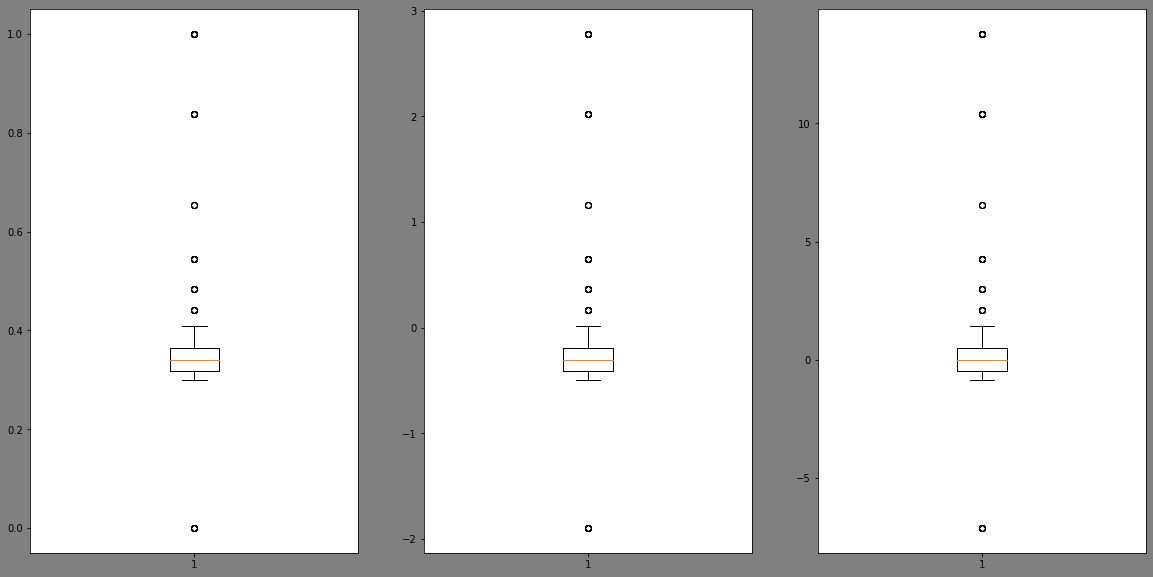

In [436]:
plt.figure(figsize=(20,10), facecolor ='grey')
plt.subplot(131)
plt.boxplot(YWCT_Well03_train_MinMax)
plt.subplot(132)
plt.boxplot(YWCT_Well03_train_Std)
plt.subplot(133)
plt.boxplot(YWCT_Well03_train_Robust)

### --> On choisit la normalisation Robust car la boite à moustache est plus centré 

### V.3.3. Entraînement du modèle 

In [437]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =50, learning_rate=0.1))

model.fit(XWCT_Well03_train, YWCT_Well03_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=50, n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_meth

In [438]:
print('R² = ' ,model.score(XWCT_Well03_test,  YWCT_Well03_test)* 100, "%")

R² =  94.61962764117828 %


In [439]:
y_predict_1 = model.predict(XWCT_Well03_train)
y_predict_2 = model.predict(XWCT_Well03_test)

print('error = ', mean_absolute_error(YWCT_Well01_test, y_predict_2))

error =  0.15869103893112205


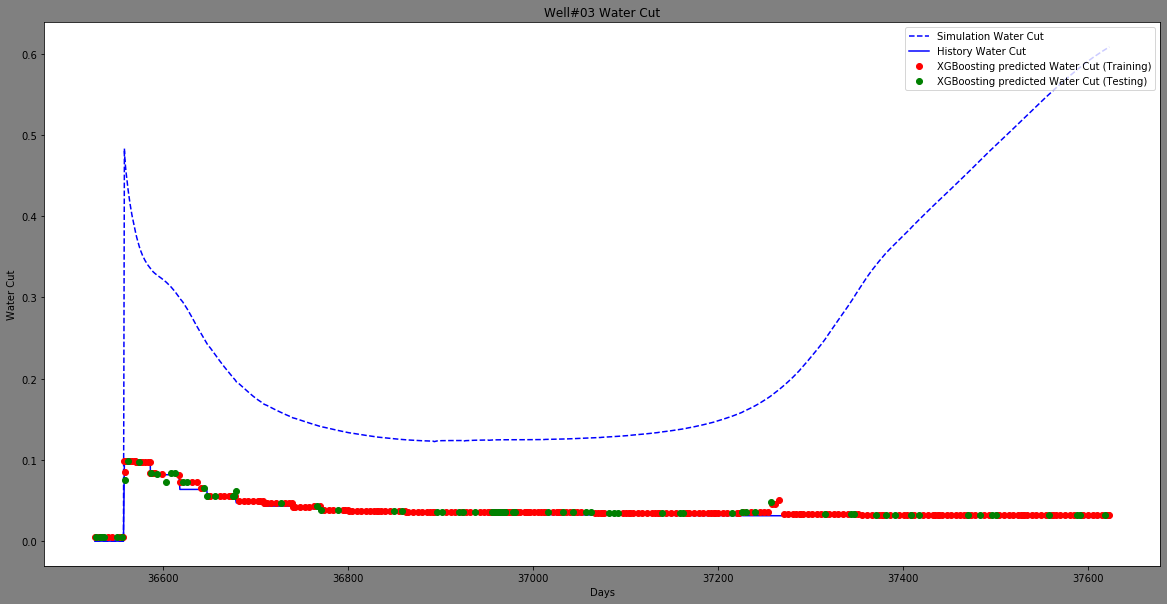

In [440]:
#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#03 Water Cut')

plt.plot(Time_Well03,WCT0_Well03.iloc[:,0], 'b--')
plt.plot(Time_Well03, WCT0_Well03.iloc[:,1],'b')
plt.plot(Time_Well03_train,y_predict_1,'ro')
plt.plot(Time_Well03_test,y_predict_2,'go')
plt.legend(['Simulation Water Cut','History Water Cut',
            'XGBoosting predicted Water Cut (Training)',
            'XGBoosting predicted Water Cut (Testing)'],loc='upper right')

### V.3.4. Validation du modèle

In [441]:
model = XGBRegressor()
cross_val_score(XGBRegressor(n_estimators = 50), XWCT_Well03_train, YWCT_Well03_train, cv=5).mean()

0.8780439479466267

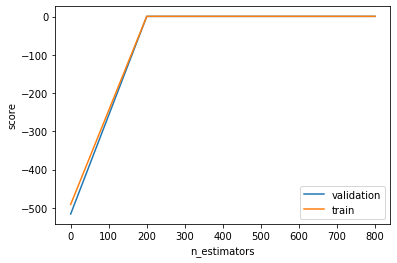

In [442]:
model = XGBRegressor()
k = np.arange(0, 1000, 200)

train_score, val_score = validation_curve(model, XWCT_Well03_train, YWCT_Well03_train,
                                          'n_estimators', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

### --> n_estimators = 200 !!

### V.3.5. Amélioration du modèle

In [443]:
param_grid = {'n_estimators': np.arange(0, 1000,100),
              'learning_rate' : np.arange(0,1,0.1), 
              'num_parallel_tree': np.arange(1,10,1),
              'random_state' :np.arange(0,100,10)
             }
grid = GridSearchCV(XGBRegressor(),param_grid,cv=5)
grid.fit(XWCT_Well03_train, YWCT_Well03_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0. , 0.5]),
     

In [283]:
print("Best R²= %f using %s" % (grid.best_score_, grid.best_params_))

Best R²= 0.877663 using {'learning_rate': 0.30000000000000004, 'n_estimators': 50, 'num_parallel_tree': 6, 'random_state': 0}


#### --> C'est fini ! Le modèle de machine learning est prêt à être utilisé 

### V.3.6. Visualation des résultats

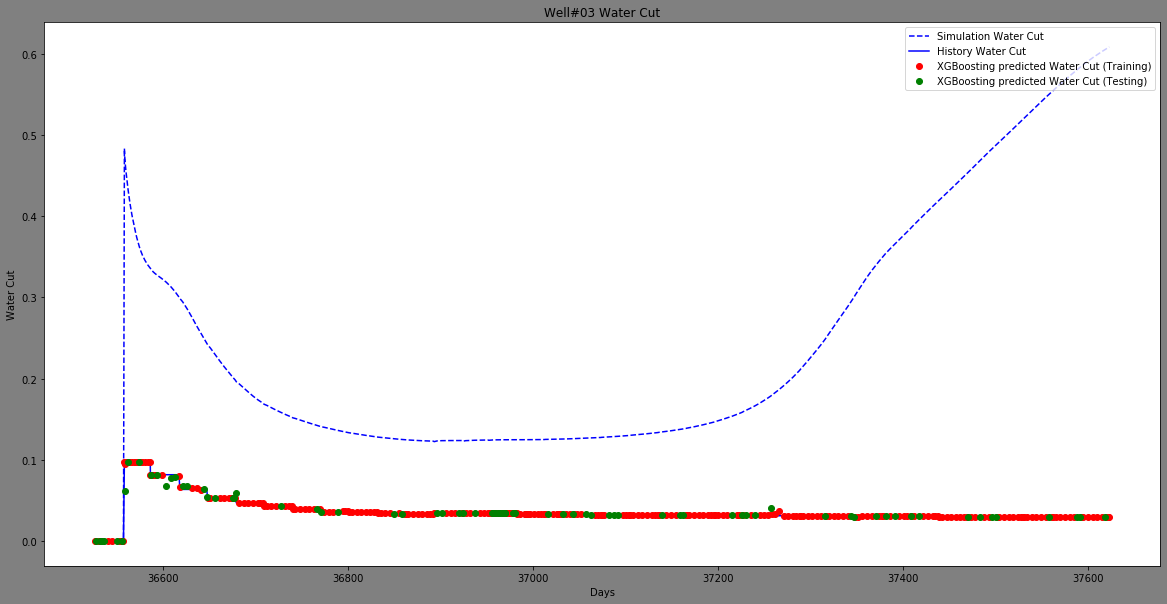

In [446]:
model = make_pipeline(RobustScaler(), XGBRegressor(random_state=0, n_estimators =50, learning_rate =  0.30000000000000004, num_parallel_tree= 6 ))

model.fit(XWCT_Well03_train, YWCT_Well03_train)
y_predict_1 = model.predict(XWCT_Well03_train)
y_predict_2 = model.predict(XWCT_Well03_test)


#--------------------------------------------------------------------------------------------------------------------------------------------#
                                                          # Plotting
#--------------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(20,10), facecolor ='grey')
plt.xlabel('Days'), plt.ylabel('Water Cut'), plt.title('Well#03 Water Cut')

plt.plot(Time_Well03,WCT0_Well03.iloc[:,0], 'b--')
plt.plot(Time_Well03, WCT0_Well03.iloc[:,1],'b')
plt.plot(Time_Well03_train,y_predict_1,'ro')
plt.plot(Time_Well03_test,y_predict_2,'go')
plt.legend(['Simulation Water Cut','History Water Cut',
            'XGBoosting predicted Water Cut (Training)',
            'XGBoosting predicted Water Cut (Testing)'],loc='upper right')


## VI.1. History Matching(Field)

En cours 